# 【ML-HW03】

### 〔Question 1 : Gaussian Process for Regression〕

#### 【import library】

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 【function define】

In [2]:
#load data
def load_data(datapath):
    data = pd.read_csv(datapath, header=None)
    return data

#exponential quadratic kernel function 
def exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, Xn, Xm):
    Xn = Xn.reshape(Xn.shape[0], )
    Xm = Xm.reshape(Xm.shape[0], )
    
    k = theta_0 * np.exp(-0.5*theta_1*np.subtract.outer(Xn, Xm)**2) + theta_2 + theta_3*np.multiply.outer(Xn, Xm)
    return k

#mean of GP predictive distribution
def mean_std(beta_inv, train_x, train_t, test_x, theta_0, theta_1, theta_2, theta_3):
    k_Xn_Xn = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, train_x, train_x)
    k = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, train_x, test_x)
    C_inv   = np.linalg.inv(k_Xn_Xn + beta_inv*np.eye(len(train_x)))
    mean = np.linalg.multi_dot([k.T, C_inv, train_t])
    
    c = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, test_x, test_x) + beta_inv*np.eye(len(test_x))
    variance = np.absolute(c - np.linalg.multi_dot([k.T, C_inv, k]))
    standard_devia = np.sqrt(variance)
    
    return mean, standard_devia

#root mean square errors
def rms(beta_inv, train_x, train_t, test_x, theta_0, theta_1, theta_2, theta_3):
    err = 0
    N = train_x.size
    k_same = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, train_x, train_x)
    C_inv = np.linalg.inv(k_same + beta_inv*np.eye(len(train_x)))

    c = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, test_x, test_x) + beta_inv * np.eye(len(test_x))
    k = exp_qua_kernel_func(theta_0, theta_1, theta_2, theta_3, train_x, test_x)

    mean = np.linalg.multi_dot([k.T, C_inv, train_t])
    E_rms = (np.sum((mean - train_t)**2 / N))**0.5
    return E_rms

#calculate value to plot
def value_plt(m, s):
    size = len(m)
    mean_reshape = m.reshape((size,))
    bound = np.diagonal(s)
    return mean_reshape, bound
#plt
def plt_result(plt_size, plt_pos, data, mean, bound, data_x, data_t, theta_set):   
    if(theta_set!=4):
        plt.subplot(plt_size, plt_size, plt_pos)
    plt.plot(data, mean, 'r')
    plt.fill_between(data, (mean+bound), (mean-bound), facecolor='pink')
    plt.scatter(data_x, data_t, marker='o', c='', edgecolors='b')
    plt.xlabel('x')
    plt.ylabel('t', rotation=0)
    if (theta_set==0):
        plt.title('theta : [0, 0, 0, 1]')
    elif(theta_set==1):
        plt.title('theta : [1, 16, 0, 0]')
    elif(theta_set==2):
        plt.title('theta : [1, 16, 0,  4]')
    elif(theta_set==3):
        plt.title('theta : [1, 64, 32, 5]')
    elif(theta_set==4):
        plt.title('theta : [1, 128, 64, 5]')

#### 【Data preprocessing】

In [3]:
# Load Data 
print('*-------------------*')
print('*  loading data...  *')
print('*-------------------*')
data_x_path = ('/home/shaowen0213/ML/HW3/2020_ver/dataset/gp_x.csv')
data_t_path = ('/home/shaowen0213/ML/HW3/2020_ver/dataset/gp_t.csv')
data_x= load_data(data_x_path)
data_t= load_data(data_t_path)
data_x = np.array(data_x)
data_t = np.array(data_t)
print(f'data_x shape:{data_x.shape}')
# print(f'data_x type:{type(data_x)}')
# print(f'data_x_contains:{data_x}')
print(f'data_t shape:{data_t.shape}')
# print(f'data_t type:{type(data_t)}')
# print(f'data_t_contains:{data_x}')

print('                                   ')

data_num  = 100
train_num = 50
print('*-------------------*')
print('*  slicing data...  *')
print('*-------------------*')
print('ratio (train:test) --> '+ str(train_num) +':'+ str(100-train_num))
train_x = data_x[0:train_num,  :]
test_x  = data_x[train_num:100,:]
train_t = data_t[0:train_num,  :]
test_t  = data_t[train_num:100,:]
print(f'train_x shape:{train_x.shape}')
# print(f'train_x type:{type(train_x)}')
# print(f'train_x_contains:{train_x}')
print(f'test_x  shape:{test_x.shape}')
# print(f'test_x type:{type(test_x)}')
# print(f'test_x_contains:{test_x}')
print('----------------------')

*-------------------*
*  loading data...  *
*-------------------*
data_x shape:(100, 1)
data_t shape:(100, 1)
                                   
*-------------------*
*  slicing data...  *
*-------------------*
ratio (train:test) --> 50:50
train_x shape:(50, 1)
test_x  shape:(50, 1)
----------------------


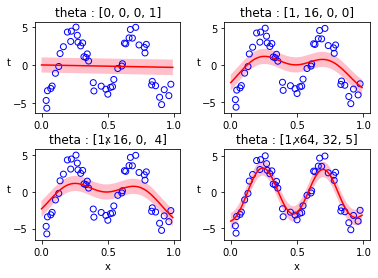

*---------------------------*
*  tune hyperparameters...  *
*---------------------------*


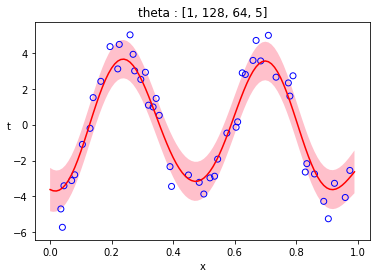

╔══════════════════════════════╗
║    Training Set RMS error    ║
╚══════════════════════════════╝
theta set : [0, 0,  0, 1]: 3.1292014298222437
theta set : [1, 4,  0, 0]: 2.423927927831219
theta set : [1, 4,  0, 5]: 2.4105764871252062
theta set : [1, 64, 32,5]: 1.0407524150477088
╔══════════════════════════════╗
║    Training Set RMS error    ║
║      after tuning......      ║
╚══════════════════════════════╝
theta set : [1, 128, 64, 10]: 0.897770446187698
╔══════════════════════════╗
║    Test Set RMS error    ║
╚══════════════════════════╝
theta set : [0, 0,  0, 1]: 3.3201767255281416
theta set : [1, 4,  0, 0]: 2.4656937876934766
theta set : [1, 4,  0, 5]: 2.4557650874208927
theta set : [1, 64, 32,5]: 1.0906935313340005
╔══════════════════════════╗
║    Test Set RMS error    ║
║    after tuning......    ║
╚══════════════════════════╝
theta set : [1, 128, 64, 10]: 0.9844080560106174


In [6]:
beta_inv = 1
test_mean01, test_std01 = mean_std(beta_inv, train_x, train_t, test_x, 0, 0,  0,  1)
test_mean02, test_std02 = mean_std(beta_inv, train_x, train_t, test_x, 1, 16, 0,  0)
test_mean03, test_std03 = mean_std(beta_inv, train_x, train_t, test_x, 1, 16, 0,  4)
test_mean04, test_std04 = mean_std(beta_inv, train_x, train_t, test_x, 1, 64, 32, 5)
# print(f'test_mean01:{test_mean01}')
# print(f'test_mean02:{test_mean02}')
# print(f'test_mean03:{test_mean03}')
# print(f'test_mean04:{test_mean04}')
# print(f'test_std01 :{test_std01}')
# print(f'test_std02 :{test_std02}')
# print(f'test_std03 :{test_std03}')
# print(f'test_std04 :{test_std04}')

dataN = np.arange(0, 1, 0.01)
mean01, std01 = mean_std(beta_inv, train_x, train_t, dataN, 0, 0,  0,  1)
mean02, std02 = mean_std(beta_inv, train_x, train_t, dataN, 1, 16, 0,  0)
mean03, std03 = mean_std(beta_inv, train_x, train_t, dataN, 1, 16, 0,  4)
mean04, std04 = mean_std(beta_inv, train_x, train_t, dataN, 1, 64, 32, 5)
new_mean_1, bound_1 = value_plt(mean01, std01)
new_mean_2, bound_2 = value_plt(mean02, std02)
new_mean_3, bound_3 = value_plt(mean03, std03)
new_mean_4, bound_4 = value_plt(mean04, std04)

plt_size = 2
plt.figure()
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt_result(plt_size, 1, dataN, new_mean_1, bound_1, train_x, train_t, 0)
plt_result(plt_size, 2, dataN, new_mean_2, bound_2, train_x, train_t, 1)
plt_result(plt_size, 3, dataN, new_mean_3, bound_3, train_x, train_t, 2)
plt_result(plt_size, 4, dataN, new_mean_4, bound_4, train_x, train_t, 3)
plt.show()

print('*---------------------------*')
print('*  tune hyperparameters...  *')
print('*---------------------------*')

mean_tune_hype, std_tune_hype = mean_std(beta_inv, train_x, train_t, dataN, 1, 128, 64,10)
new_mean_tune_hype, bound_tune_hype = value_plt(mean_tune_hype, std_tune_hype)
plt.figure()
plt_result(plt_size, 1, dataN, new_mean_tune_hype, bound_tune_hype, train_x, train_t, 4)
plt.show()


train_err_1 = rms(beta_inv, train_x, train_t, train_x, 0, 0,  0, 1)
train_err_2 = rms(beta_inv, train_x, train_t, train_x, 1, 16, 0, 0)
train_err_3 = rms(beta_inv, train_x, train_t, train_x, 1, 16, 0, 4)
train_err_4 = rms(beta_inv, train_x, train_t, train_x, 1, 64, 32,5)
train_err_5 = rms(beta_inv, train_x, train_t, train_x, 1, 128, 64,10)
print('╔══════════════════════════════╗')
print('║    Training Set RMS error    ║')
print('╚══════════════════════════════╝')

print('theta set : [0, 0,  0, 1]:', train_err_1)
print('theta set : [1, 4,  0, 0]:', train_err_2)
print('theta set : [1, 4,  0, 5]:', train_err_3)
print('theta set : [1, 64, 32,5]:', train_err_4)
print('╔══════════════════════════════╗')
print('║    Training Set RMS error    ║')
print('║      after tuning......      ║')
print('╚══════════════════════════════╝')
print('theta set : [1, 128, 64, 10]:', train_err_5)


test_err_1 = rms(beta_inv, test_x, test_t, test_x, 0, 0,  0, 1)
test_err_2 = rms(beta_inv, test_x, test_t, test_x, 1, 16, 0, 0)
test_err_3 = rms(beta_inv, test_x, test_t, test_x, 1, 16, 0, 4)
test_err_4 = rms(beta_inv, test_x, test_t, test_x, 1, 64, 32,5)
test_err_5 = rms(beta_inv, test_x, test_t, test_x, 1, 128, 64,10)
print('╔══════════════════════════╗')
print('║    Test Set RMS error    ║')
print('╚══════════════════════════╝')
print('theta set : [0, 0,  0, 1]:', test_err_1)
print('theta set : [1, 4,  0, 0]:', test_err_2)
print('theta set : [1, 4,  0, 5]:', test_err_3)
print('theta set : [1, 64, 32,5]:', test_err_4)
print('╔══════════════════════════╗')
print('║    Test Set RMS error    ║')
print('║    after tuning......    ║')
print('╚══════════════════════════╝')
print('theta set : [1, 128, 64, 10]:', test_err_5)



### 〔Question 2 : Support Vector Machine〕

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os.path as osp
from sklearn.svm import SVC

In [2]:
#load data
def load_data(datapath):
    data = pd.read_csv(datapath, header=None)
    return data

def make_PCA(x, d):
    mean = np.mean(x, axis=0)
    U, S, V = np.linalg.svd(x, full_matrices=False)
    ud = U[:, :d]
    Ud = ud*S[:d]
    Vd = V[:d]
    explaned_variance_ = (S**2)/ (160-1)
    explaned_variance_ = explaned_variance_[:d]
    Img = np.dot(Ud, Vd) + mean
    
    return Img, Ud

def kernel_degree(k_type):
    if k_type =='linear':
        return 1
    elif k_type=='poly':
        return 2

def kernel_type_func(Xi, Xj, kernel_degree):
#     kernel_value = np.dot(Xi.T, Xj)
    if (kernel_degree==1):
        return np.dot(Xi.T, Xj)
    elif (kernel_degree==2):
        return np.dot(Xi.T, Xj)**2

def value_plt_fig_size(data, size):
    data_mean   = np.mean(data, axis=0)
    data_std    = np.std(data, axis=0)
    data_normal = np.zeros((len(data), 2))
#     print(f'data_normal:{data_normal}')
    print(f'data_normal shape:{data_normal.shape}')
    for i in range(data_normal.shape[0]):
#         print(data_normal.shape[0])
        data_normal[i][0] = (data_x_dimen2[i][0]-data_mean[0])/data_std[0]
        data_normal[i][1] = (data_x_dimen2[i][1]-data_mean[1])/data_std[1]
    for i in range(data_normal.shape[1]):
        print(i)
        max_x = np.max(data_normal[:,i])
        min_x = np.min(data_normal[:,i])
        if i==0:
            max_x1 = max_x
            min_x1 = min_x
        elif i==1:
            max_x2 = max_x
            min_x2 = min_x
#     print(max_x1,min_x1,max_x2,min_x2)    
    print('---------------------------')       
    #value for plot figure
    #https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
    plt_x1 = np.linspace(math.floor(min_x1), math.ceil(max_x1), size)
    plt_x2 = np.linspace(math.floor(min_x2), math.ceil(max_x2), size)
    plt_test = np.zeros((size, size))
    
    return plt_x1, plt_x2, plt_test, data_normal

def coefficient_multiplier(data_x, data_t, kernel_type):
    x = data_x
    t = data_t
    #svm model, degree of the polynomial kernel function. Ignored by all other kernels.
    if kernel_type=='linear':
        svm = SVC(kernel='linear', gamma='auto')
    else:
        svm = SVC(kernel='poly', degree=2, gamma='auto')
    #start training 
    svm.fit(x, t)                           # fit the SVM model according to the "input train data"
    alpha = np.abs(svm.dual_coef_)          # get the Lagrange multipliers(SV_num*2)
                                            # coefficient for all 1-vs-1 classifiers.
    target_value = np.sign(svm.dual_coef_)  # get the (SV_num*2)
    support_index = svm.support_            # get the support vectors index in train data(SV_num)
    support_vector = svm.support_vectors_   # get the support vectors directly(SV_num)
    return alpha, target_value, support_index, support_vector

def cal_y_b(test_x, data_after_pca, data_t, b, kernel_class, kernel_type, ctrl): 
    k_degree = kernel_degree(kernel_type)
    if(ctrl == 'b'):
        b = [0, 0, 0]   # initial three class's
        for class_idx in range(3):
            num_of_class = len(kernel_class[class_idx])
            for i in range(num_of_class):
                tmp = 0
                for j in range(num_of_class):
                    kernel_func_valur = kernel_type_func(data_after_pca[int(kernel_class[class_idx][i][0])], data_after_pca[int(kernel_class[class_idx][j][0])], k_degree)
                #sigma(am*tm*k)
                    tmp += kernel_class[class_idx][j][2]*kernel_class[class_idx][j][1]*kernel_func_valur
                b[class_idx] += (kernel_class[class_idx][i][1] - tmp)
            b[class_idx] = b[class_idx]/len(kernel_class[class_idx])
        return b
    elif(ctrl == 'y'):
        y = [0, 0, 0]   # y0:0vs1, y1:0vs2, y2:1vs2
        for class_idx in range(3):
            for i in range(len(kernel_class[class_idx])):
                kernel_func_value = kernel_type_func(test_x, data_after_pca[int(kernel_class[class_idx][i][0])], k_degree)
                #y = sigma(an*tn*k)+b
                y[class_idx] += kernel_class[class_idx][i][2]*kernel_class[class_idx][i][1]*kernel_func_value
            y[class_idx] += b[class_idx]
#     print(f'y = :{y}')
        hard_d_y = np.sign(y) #classfy to 1 or -1 
#     print(f'hard_d_y = :{hard_d_y}')
        if (hard_d_y[0]==1 and hard_d_y[1]==1):
            predict_class = 0
        elif (hard_d_y[0]==-1 and hard_d_y[2]==1):
            predict_class = 1
        elif (hard_d_y[1]==-1 and hard_d_y[2]==-1):
            predict_class = 2
        else:
            predict_class = 3
        return predict_class

def plot_svc(fig_name, draw_x1, draw_x2, draw_test, tibetan_0, tibetan_1, tibetan_2, tibetan_svm):
    plt.figure(fig_name, figsize=(10,5))
    plt.suptitle(fig_name, fontsize=18)
    colors = ('pink', 'lightblue', 'lightgreen', 'white')
    cmap = ListedColormap(colors[:len(np.unique(draw_test))])
    plt.pcolormesh(draw_x1, draw_x2, draw_t, cmap=cmap, alpha=1)
    tibetan0  = plt.scatter(tibetan_0[0], tibetan_0[1], s=15, c='red',  marker='x', edgecolor='red',  label='Tibetan 0')
    tibetan1  = plt.scatter(tibetan_1[0], tibetan_1[1], s=15, c='blue', marker='x', edgecolor='blue', label='Tibetan 1')
    tibetan2  = plt.scatter(tibetan_2[0], tibetan_2[1], s=15, c='green',marker='x', edgecolor='green',label='Tibetan 2')
    tibetansv = plt.scatter(tibetan_svm[0], tibetan_svm[1], s=20, facecolor='none', marker='o', edgecolor='black', label='Support Vector')
    plt.legend(handles = [tibetan0, tibetan1, tibetan2, tibetansv], loc='upper right')
    plt.show()

#SVM with kernel to do multi-classificatiion, plot corresponding decision boundary
def multi_classi_cdb(pca_value, data_t, kernel_type, size, draw_x1, draw_x2, tibetan_0, tibetan_1, tibetan_2):
    _alphas, _target_value, _support_index, _support_vector = coefficient_multiplier(pca_value, data_t, kernel_type)
    _svm =[[], []]
    for i in range(len(_support_index)):
        j = _support_index[i]
        _svm[0].append(pca_value[j][0])
        _svm[1].append(pca_value[j][1])

    _class = [[], [], []]   #class: 0vs1 0vs2 1vs2
    for i in range(len(_support_index)):
        index = _support_index[i]
        if int(data_t[index])==0:
            class_type = [0, 1]
        elif int(data_t[index])==1:
            class_type = [0, 2]
        else:
            class_type = [1, 2]
        for j in range(2):
            if _alphas[j][i]!=0:
                _class[class_type[j]].append([_support_index[i], _target_value[j][i], _alphas[j][i]])
    
    _b = cal_y_b(0, pca_value, 0, 0, _class, kernel_type, 'b')
#     _b = cal_b(pca_value, _class, kernel_type)
    for i in range(size):
        for j in range(size):
            test_data = np.array([draw_x1[i], draw_x2[j]])
#             draw_t[j][i] = decision_y(test_data, pca_value, data_t, _b, _class, kernel_type)
            draw_t[j][i] = cal_y_b(test_data, pca_value, data_t, _b, _class, kernel_type, 'y')
    
    if (kernel_type=='linear'):   
        print('*-------------------------*')
        print('*  plot linear result...  *')
        print('*-------------------------*')
        plot_svc('Linear', draw_x1, draw_x2, draw_t, tibetan_0, tibetan_1, tibetan_2, _svm)
    elif (kernel_type=='poly'):
        print('*-----------------------------*')
        print('*  plot Polynomial result...  *')
        print('*-----------------------------*')
        plot_svc('Polynomial', draw_x1, draw_x2, draw_t, tibetan_0, tibetan_1, tibetan_2, _svm)

In [3]:
# Load Data 
print('*-------------------*')
print('*  loading data...  *')
print('*-------------------*')
data_x_path = ('/home/shaowen0213/ML/HW3/2020_ver/dataset/x_train.csv')
data_t_path = ('/home/shaowen0213/ML/HW3/2020_ver/dataset/t_train.csv')
data_x= load_data(data_x_path)
data_t= load_data(data_t_path)
data_x = np.array(data_x)
data_t = np.array(data_t)
print(f'data_x shape:{data_x.shape}')
# print(f'data_x type:{type(data_x)}')
# print(f'data_x_contains:{data_x}')
print(f'data_t shape:{data_t.shape}')
# print(f'data_t type:{type(data_t)}')
# print(f'data_t_contains:{data_t}')

print('*-------------*')
print('*  Doing PCA  *')
print('*-------------*')
data_x_orgi, data_x_dimen2 = make_PCA(data_x, 2)
print(f'data_x_orgi shape:{(data_x_orgi).shape}')
print(f'data_x_dimen2 shape:{(data_x_dimen2).shape}')

draw_x1, draw_x2, draw_t,  data_x_dimen2_normal = value_plt_fig_size(data_x_dimen2, 200)
# print(f'draw_x1 shape:{(draw_x1).shape}')
# print(f'draw_x2 shape:{(draw_x2).shape}')
# print(f'draw_t shape:{(draw_t).shape}')
# print(f'draw_x1 :{draw_x1}')
# print(f'draw_x2 :{draw_x2}')
# print(f'draw_t :{draw_t}')
print(f'data_x_dimen2_normal shape:{(data_x_dimen2_normal).shape}')
print(f'data_x_dimen2_normal shape:{(data_x_dimen2_normal).shape[0]}') #300

*-------------------*
*  loading data...  *
*-------------------*
data_x shape:(300, 784)
data_t shape:(300, 1)
*-------------*
*  Doing PCA  *
*-------------*
data_x_orgi shape:(300, 784)
data_x_dimen2 shape:(300, 2)
data_normal shape:(300, 2)
0
1
---------------------------
data_x_dimen2_normal shape:(300, 2)
data_x_dimen2_normal shape:300


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*-------------------------*
*  plot linear result...  *
*-------------------------*


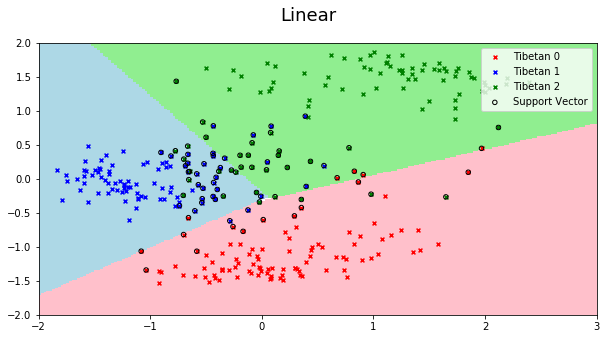

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*-----------------------------*
*  plot Polynomial result...  *
*-----------------------------*


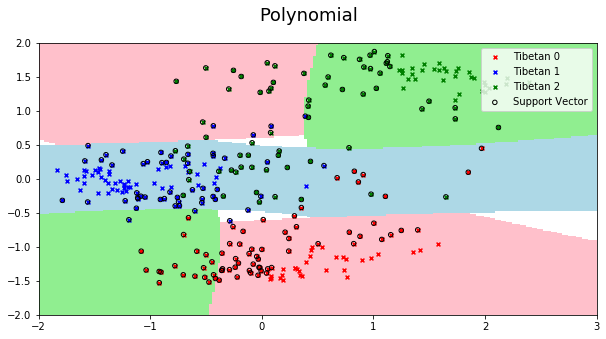

In [4]:
# classify data to 3 tibetan class 
tibetan_0, tibetan_1, tibetan_2= ([[], []], [[], []], [[], []])
for i in range(data_x_dimen2_normal.shape[0]): 
    if (data_t[i]==0):
        tibetan_0[0].append(data_x_dimen2_normal[i][0])
        tibetan_0[1].append(data_x_dimen2_normal[i][1])
    elif (data_t[i]==1):
        tibetan_1[0].append(data_x_dimen2_normal[i][0])
        tibetan_1[1].append(data_x_dimen2_normal[i][1])
    elif (data_t[i]==2):
        tibetan_2[0].append(data_x_dimen2_normal[i][0])
        tibetan_2[1].append(data_x_dimen2_normal[i][1])

# linear
multi_classi_cdb(data_x_dimen2_normal, data_t, 'linear', 200, draw_x1, draw_x2, tibetan_0, tibetan_1, tibetan_2)
# poly 
multi_classi_cdb(data_x_dimen2_normal, data_t, 'poly', 200, draw_x1, draw_x2, tibetan_0, tibetan_1, tibetan_2)

In [1]:
import numpy as np
import scipy.io
import cv2
import os.path as osp
import math
import matplotlib.pyplot as plt

In [2]:
k_mean_num = 2
train_data_size = 10
kmeans_center = []
kmeans_team = []
gmm_iteration = 100

def load_data(path):
    img = cv2.imread(path) 
    data = []
    for i in range(img.shape[0]):       # img row:239
        for j in range(img.shape[1]):   # img col:320
            data.append(img[i][j])
            # print(img[i][j])
    # cv2.imshow('Hw3',img)
    return data

def euclid_dis(x,y):
    sum = 0
    for i in range(len(x)):
        sum += (float(y[i])-float(x[i]))**2
    return int(sum**0.5)

def cluster(x, kx):
    team = []
    for i in range(k_mean_num):
        team.append([])
    mid_dis = 99999999
    for i in range(train_data_size):
        for j in range(k_mean_num):
            distant = euclid_dis(x[i], kx[j])
            if distant < mid_dis:
                mid_dis = distant
                flag = j
        team[flag].append([x[i],i]) # team[k] = [[data],index]
        mid_dis = 99999999
    return team

def re_seed(team, y):
    new_seed = []

    for i in range(0,k_mean_num):           # team num
        sum_x = np.linspace(0,0,3)
        for j in range(0,len(team[i])):     # data in one team
            for k in range(0,3):            # data's 3 attribute(BGR)
                sum_x[k] += team[i][j][0][k]
        for k in range(0,3):
            # print(sum_x[k],len(team[i]))
            sum_x[k] = float(sum_x[k]/len(team[i]))
        new_seed.append(sum_x)
    return new_seed

def kmeans(x, kx, fig):
    team = cluster(x, kx)
    nkx = re_seed(team, kx)
    print('The {:d}-th time in kmeans(K={})'.format(fig,k_mean_num))
    for i in range(0,len(nkx)):
        print(nkx[i])
    
    # detect center change or not
    for i in range(0,len(nkx)):
        for j in range(len(nkx[i])):
            if math.fabs(nkx[i][j]-kx[i][j]) > 10**(-4):
                fig += 1
                kmeans(x,nkx,fig)
                return
    kmeans_center.clear()
    kmeans_team.clear()
    for i in range(0,len(nkx)):
        kmeans_center.append(nkx[i])
    for i in range(len(team)):
        kmeans_team.append(team[i])

def save_img(gmm_flag=False):
    cluster_img = np.zeros((239, 320, 3), dtype = "uint8")
    for i in range(len(kmeans_team)):
        pixel_color = [int(kmeans_center[i][0]),int(kmeans_center[i][1]),int(kmeans_center[i][2])]
        for j in range(len(kmeans_team[i])):
            img_index_i = int(kmeans_team[i][j][1]/320)
            img_index_j = int(kmeans_team[i][j][1]%320)
            for color in range(3):
                cluster_img[img_index_i][img_index_j][color] = pixel_color[color]
    if gmm_flag == False:
        fig_name = osp.join('/home/shaowen0213/ML/HW3/2020_ver/output/', 'K-means with K = '+str(k_mean_num)+'.png')
    else:
        fig_name = osp.join('/home/shaowen0213/ML/HW3/2020_ver/output/', 'GMM with K = '+str(k_mean_num)+'.png')
    cv2.imwrite(fig_name,cluster_img)
# x,mean --> ㄐow vectors
def gaussian(x,mean,cov):   
    cov_det = np.linalg.det(cov)
    a = 1/((((2*math.pi)**3)*cov_det)**0.5)
    A = (np.array(x).reshape((3,1))-np.array(mean).reshape((3,1)))
    B = np.dot(A.T,np.linalg.pinv(cov))
    b = -0.5*(np.dot(B,A))

    return a*math.exp(b)

def plot_likelihood(mean_list,pi_list,cov_list,fig_name):
    b = np.linspace(0,255,100)
    g = np.linspace(0,255,100)
    r = np.linspace(0,255,100)
    gray = np.linspace(0,0,1000000)
    prob_gray = np.linspace(0,0,1000000)
    print('Ploting likelihood:')
    for i in range(100):
        for j in range(100):
            for k in range(100):
                sum_temp = 0
                for cluster_index in range(k_mean_num):
                    xn = np.array([b[i],g[j],r[k]])
                    sum_temp += pi_list[cluster_index]*gaussian(xn,mean_list[cluster_index],cov_list[cluster_index])
                # prob[i][j][k] = math.log1p(sum_temp)
                prob_gray[10000*i+100*j+k] = math.log1p(sum_temp)
                gray[10000*i+100*j+k] = 0.2989 * r[k] + 0.5870 * g[j] + 0.1140 * b[i]
    plt.figure(fig_name,figsize=(10,5))
    plt.suptitle(fig_name,fontsize=18)
    plt.xlabel('gray color',fontsize=14)
    plt.ylabel('ln(P)',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    line, = plt.plot(gray, prob_gray, color='blue', linewidth = 2, label = 'log likelihood')
    plt.legend(handles = [line], loc='upper right')
    save_fig_path = osp.join('/home/shaowen0213/ML/HW3/2020_ver/output/', fig_name)
    plt.savefig(save_fig_path)



def GMM(img,first=True):
    mean_list = []
    pi_list = []
    cov_list = []
    for i in range(len(kmeans_team)):
        center = [float(kmeans_center[i][0]),float(kmeans_center[i][1]),float(kmeans_center[i][2])]
        center = np.array(center)
        mean_list.append(center)
        pi_list.append(len(kmeans_team[i])/train_data_size)
        temp = np.zeros((3,3))
        for j in range(len(kmeans_team[i])):
            xn = np.array(img[kmeans_team[i][j][1]])
            col_vec = xn.reshape((3,1)) - mean_list[i].reshape((3,1))
            temp += col_vec * col_vec.T
        cov_list.append(temp/len(kmeans_team[i]))
    total = 0
    r_temp = []
    
    for iter_index in range(gmm_iteration):
        print('The {}-th iteration in GMM(k={})'.format(iter_index+1,k_mean_num))
        # E-step
        r = np.zeros((train_data_size,k_mean_num))
        total = 0
        team = []
        for i in range(k_mean_num):
            team.append([])
        for i in range(train_data_size):
            r_temp.clear()
            total = 0
            for j in range(k_mean_num):
                temp = pi_list[j]*gaussian(img[i],mean_list[j],cov_list[j])
                r_temp.append(temp)
                total += temp
            for k in range(k_mean_num):
                r_temp[k] /= total
                r[i][k] = r_temp[k]
                
            cluster_max = max(r_temp)
            cluster_index = r_temp.index(cluster_max)
            team[cluster_index].append([img[i],i])
        kmeans_team.clear()
        for i in range(len(team)):
            kmeans_team.append(team[i])

        # M-step
        kmeans_center.clear()
        for i in range(k_mean_num):
            Nk = 0
            mean_sum = np.zeros((1,3))
            cov_sum = np.zeros((3,3))
            for j in range(train_data_size):
                r_znk = r[j][i]
                Nk += r_znk
                mean_sum += r_znk*np.array(img[j])
            mean_list[i] = mean_sum/Nk
            # print(mean_list[i].tolist())
            kmeans_center.append(mean_list[i].tolist()[0])
            pi_list[i] = Nk/train_data_size
            for j in range(train_data_size):
                r_znk = r[j][i]
                cov_sum += r_znk*(np.array(img[j]).reshape((3,1))-mean_list[i].reshape((3,1)))*(np.array(img[j]).reshape((3,1))-mean_list[i].reshape((3,1))).T
            cov_list[i] = cov_sum / Nk
        print('mean:\n{}'.format(mean_list))
        print('pi:\n{}'.format(pi_list))
        print('covariance:\n{}'.format(cov_list))
    save_img(gmm_flag=True)
    fig_name = 'GMM log likelihood (k='+str(k_mean_num)+')'
    plot_likelihood(mean_list,pi_list,cov_list,fig_name)
    #save result
    path = osp.join('/home/shaowen0213/ML/HW3/2020_ver/output/', 'GMM(k='+str(k_mean_num)+')'+'.txt')
    with open(path,'w') as file:
        file.write('mean\n')
        print(kmeans_center,file=file)
        file.write('Pi\n')
        print(pi_list,file=file)
        file.write('covariance\n')
        print(cov_list,file=file)
        file.close()  
    return


*---------------------*
*  loading image...  *
*---------------------*
image size =:76480
The 0-th time in kmeans(K=3)
[76.6523623  92.43546371 97.37571869]
[132.81300834 152.61777928 157.14884494]
[46.72738114 59.06889521 66.6380597 ]
The 1-th time in kmeans(K=3)
[ 79.62979185  97.81255087 105.10333734]
[148.32135596 166.6505644  169.34158312]
[43.34412097 56.00194087 63.47501693]
The 2-th time in kmeans(K=3)
[ 84.2462389  103.15104708 110.76381303]
[156.96461259 174.63014045 176.06491206]
[44.04911454 56.66989444 64.05037948]
The 3-th time in kmeans(K=3)
[ 88.44156226 108.01993605 115.56956408]
[162.96849637 179.90534505 180.57921529]
[45.64848654 58.43092487 65.82874165]
The 4-th time in kmeans(K=3)
[ 91.95024631 112.09139573 119.55586207]
[167.35541563 183.70173025 183.82925022]
[47.2867937  60.19317386 67.59142678]
The 5-th time in kmeans(K=3)
[ 94.88313501 115.37120255 122.7947218 ]
[170.85460891 186.69159467 186.3270012 ]
[48.5870941  61.70059135 69.0821662 ]
The 6-th time in km

mean:
[array([[ 96.51883097, 127.69514667, 135.42965696]]), array([[175.21068296, 177.88971224, 170.78655922]]), array([[58.40617755, 70.03050738, 79.58683592]])]
pi:
[0.34689922210421265, 0.1978692582749731, 0.4552315196208082]
covariance:
[array([[1031.22047622,  769.36574197,  866.44238184],
       [ 769.36574197, 1181.7768388 , 1210.33130508],
       [ 866.44238184, 1210.33130508, 1531.5502239 ]]), array([[1525.8800331 , 1392.19087573, 1384.88002004],
       [1392.19087573, 1476.27207488, 1560.09962322],
       [1384.88002004, 1560.09962322, 1745.376764  ]]), array([[539.25749957, 497.75706127, 503.83836813],
       [497.75706127, 534.31406484, 550.36200093],
       [503.83836813, 550.36200093, 655.25045096]])]
The 7-th iteration in GMM(k=3)
mean:
[array([[ 95.36392752, 127.9314486 , 136.0199346 ]]), array([[171.96603822, 173.45517267, 165.94630076]]), array([[58.91767014, 70.37829726, 80.14868306]])]
pi:
[0.3427377987484869, 0.20637421354190236, 0.4508879877096162]
covariance:
[ar

mean:
[array([[ 89.53226947, 125.04446586, 134.59758075]]), array([[152.5657458 , 154.74932079, 147.53190569]]), array([[59.38285237, 70.12395904, 81.28496962]])]
pi:
[0.3319837613833787, 0.2720185865139706, 0.39599765210264964]
covariance:
[array([[1362.24552495, 1251.6956799 , 1404.39826577],
       [1251.6956799 , 1696.77477714, 1709.48796996],
       [1404.39826577, 1709.48796996, 1997.20674866]]), array([[2600.84788353, 2425.90484896, 2396.42306536],
       [2425.90484896, 2401.28236603, 2427.93262667],
       [2396.42306536, 2427.93262667, 2534.86052842]]), array([[543.35146025, 531.15688856, 562.07240159],
       [531.15688856, 573.58224856, 616.23263078],
       [562.07240159, 616.23263078, 728.1275251 ]])]
The 18-th iteration in GMM(k=3)
mean:
[array([[ 89.24973982, 124.80606065, 134.47318291]]), array([[151.1026251 , 153.56481528, 146.43991062]]), array([[59.31402286, 69.99035342, 81.26232954]])]
pi:
[0.3313184062170635, 0.27789039933340204, 0.3907911944495366]
covariance:
[a

mean:
[array([[ 88.36694243, 124.71101628, 135.72271166]]), array([[136.2409072 , 141.77870257, 135.93581562]]), array([[59.1631517 , 69.05834336, 81.24846885]])]
pi:
[0.311493641454619, 0.34354271517965823, 0.34496364336572516]
covariance:
[array([[1354.92836549, 1260.45313532, 1418.14446467],
       [1260.45313532, 1735.26715177, 1720.15915946],
       [1418.14446467, 1720.15915946, 1978.40031757]]), array([[3344.79635261, 2988.36498505, 2877.28174474],
       [2988.36498505, 2821.44332129, 2777.67113453],
       [2877.28174474, 2777.67113453, 2820.17483014]]), array([[511.4142073 , 511.28848634, 547.28263678],
       [511.28848634, 553.01184939, 602.9141018 ],
       [547.28263678, 602.9141018 , 707.3278632 ]])]
The 29-th iteration in GMM(k=3)
mean:
[array([[ 88.42284296, 124.86585379, 135.99559715]]), array([[135.01222867, 140.80872199, 135.10925015]]), array([[59.17986263, 69.00188542, 81.26014666]])]
pi:
[0.30889279234182254, 0.34980630470188817, 0.34130090295628535]
covariance:


mean:
[array([[ 88.78076458, 125.8070002 , 137.58774315]]), array([[127.42054004, 134.69084563, 130.0875738 ]]), array([[59.30043215, 68.57600482, 81.27814805]])]
pi:
[0.2936756802230537, 0.3931491042019279, 0.31317521557501515]
covariance:
[array([[1332.07406068, 1234.7705204 , 1390.47798399],
       [1234.7705204 , 1723.95462225, 1684.78738037],
       [1390.47798399, 1684.78738037, 1924.10163581]]), array([[3613.09606948, 3189.77358791, 3015.54192591],
       [3189.77358791, 2968.98290053, 2871.65524378],
       [3015.54192591, 2871.65524378, 2870.54703195]]), array([[489.12170108, 498.00798918, 536.69641054],
       [498.00798918, 540.20798124, 592.9719257 ],
       [536.69641054, 592.9719257 , 694.0193086 ]])]
The 40-th iteration in GMM(k=3)
mean:
[array([[ 88.77740443, 125.81708042, 137.62306918]]), array([[127.00596117, 134.3425779 , 129.8137535 ]]), array([[59.30186644, 68.53729393, 81.26484559]])]
pi:
[0.29322656737005565, 0.39575997677597285, 0.31101345585398404]
covariance:


mean:
[array([[ 88.57137251, 125.51889926, 137.41029674]]), array([[124.46348178, 132.12211906, 128.11126547]]), array([[59.24077506, 68.16678805, 81.04607505]])]
pi:
[0.29381783463654315, 0.41213899083690386, 0.29404317452655343]
covariance:
[array([[1323.37441588, 1232.25504621, 1385.93010761],
       [1232.25504621, 1729.22402139, 1685.39722411],
       [1385.93010761, 1685.39722411, 1920.73049367]]), array([[3677.32213941, 3247.65552929, 3046.2044744 ],
       [3247.65552929, 3018.71343343, 2897.77840695],
       [3046.2044744 , 2897.77840695, 2879.08737623]]), array([[470.23766693, 482.53553334, 521.99337981],
       [482.53553334, 523.46116914, 576.06330762],
       [521.99337981, 576.06330762, 673.68563984]])]
The 51-th iteration in GMM(k=3)
mean:
[array([[ 88.54496988, 125.47252892, 137.36315088]]), array([[124.31276266, 131.98390098, 128.00828915]]), array([[59.23088002, 68.13375926, 81.02157911]])]
pi:
[0.29412905580015464, 0.4131171616206312, 0.29275378257921414]
covariance:

mean:
[array([[ 88.31448376, 125.0463408 , 136.9021297 ]]), array([[123.31792496, 131.04300875, 127.32007669]]), array([[59.13654441, 67.86817514, 80.81086598]])]
pi:
[0.29740939148127704, 0.4195159155714161, 0.28307469294730103]
covariance:
[array([[1319.61215604, 1234.58735375, 1386.66401451],
       [1234.58735375, 1735.74513872, 1692.25478752],
       [1386.66401451, 1692.25478752, 1927.34754111]]), array([[3701.61208767, 3273.82646438, 3059.24517926],
       [3273.82646438, 3043.90436046, 2911.46586441],
       [3059.24517926, 2911.46586441, 2884.48790984]]), array([[457.28388046, 470.6159517 , 509.92833217],
       [470.6159517 , 510.08593378, 561.81361469],
       [509.92833217, 561.81361469, 656.70400479]])]
The 62-th iteration in GMM(k=3)
mean:
[array([[ 88.29620001, 125.01129015, 136.86262324]]), array([[123.25445888, 130.98103774, 127.27565897]]), array([[59.12859191, 67.84814366, 80.79429263]])]
pi:
[0.2977015125368, 0.41991814746850026, 0.28238033999470213]
covariance:
[ar

mean:
[array([[ 88.159998  , 124.74556523, 136.55672648]]), array([[122.82313548, 130.55252174, 126.97240975]]), array([[59.06780534, 67.70159201, 80.67149471]])]
pi:
[0.2999926404591791, 0.4226187697460406, 0.27738858979477565]
covariance:
[array([[1317.9146742 , 1236.4791898 , 1387.64859591],
       [1236.4791898 , 1739.73044833, 1697.10410869],
       [1387.64859591, 1697.10410869, 1932.62871789]]), array([[3712.67186983, 3286.74575896, 3065.62038635],
       [3286.74575896, 3056.86292995, 2918.69194793],
       [3065.62038635, 2918.69194793, 2887.64551081]]), array([[450.05332743, 463.72199817, 502.83578604],
       [463.72199817, 502.31077968, 553.44281612],
       [502.83578604, 553.44281612, 646.77646315]])]
The 73-th iteration in GMM(k=3)
mean:
[array([[ 88.15038794, 124.72651688, 136.53436775]]), array([[122.79499436, 130.5240879 , 126.95255582]]), array([[59.06342758, 67.69140103, 80.66288358]])]
pi:
[0.30016166180245013, 0.422792528807248, 0.2770458093903034]
covariance:
[ar

mean:
[array([[ 88.08225318, 124.59031406, 136.37274946]]), array([[122.6024511 , 130.32781297, 126.81657213]]), array([[59.03212296, 67.61962741, 80.60210082]])]
pi:
[0.30138788443568326, 0.4239708801400243, 0.2746412354242871]
covariance:
[array([[1317.1675736 , 1237.53663536, 1388.25360951],
       [1237.53663536, 1741.78093871, 1699.73575829],
       [1388.25360951, 1699.73575829, 1935.62529429]]), array([[3717.83098879, 3292.96148607, 3068.67059117],
       [3292.96148607, 3063.18504468, 2922.24924002],
       [3068.67059117, 2922.24924002, 2889.25659595]]), array([[446.44714747, 460.24200869, 499.24002869],
       [460.24200869, 498.38979419, 549.21493053],
       [499.24002869, 549.21493053, 641.77934011]])]
The 84-th iteration in GMM(k=3)
mean:
[array([[ 88.07763967, 124.58101648, 136.3616017 ]]), array([[122.58982911, 130.31483537, 126.80765126]]), array([[59.02998831, 67.61479741, 80.59800486]])]
pi:
[0.3014727217532973, 0.4240474025410515, 0.2744798757056523]
covariance:
[ar

mean:
[array([[ 88.04551389, 124.51599421, 136.28320652]]), array([[122.50333723, 130.22550342, 126.74650517]]), array([[59.0150825 , 67.58127527, 80.56957058]])]
pi:
[0.30207018111672784, 0.42456889344995097, 0.2733609254333221]
covariance:
[array([[1316.84037402, 1238.06358494, 1388.56610059],
       [1238.06358494, 1742.76609996, 1701.03041346],
       [1388.56610059, 1701.03041346, 1937.13017031]]), array([[3720.21484498, 3295.86851853, 3070.09281562],
       [3295.86851853, 3066.15657282, 2923.92704046],
       [3070.09281562, 2923.92704046, 2890.02758801]]), array([[444.7428748 , 458.58988696, 497.53086727],
       [458.58988696, 496.53066064, 547.21049516],
       [497.53086727, 547.21049516, 639.41491985]])]
The 95-th iteration in GMM(k=3)
mean:
[array([[ 88.04337244, 124.51164203, 136.27793147]]), array([[122.49765982, 130.21961362, 126.74249044]]), array([[59.01408671, 67.57904815, 80.56768136]])]
pi:
[0.3021104367768212, 0.4246029326968554, 0.27328663052631974]
covariance:
[

The 13-th time in kmeans(K=5)
[69.77787893 86.15311789 93.50632681]
[146.81760903 166.94059406 168.5443908 ]
[39.66084194 51.96159083 59.22750482]
[208.37490281 217.00839683 213.80314104]
[103.0755814  124.70612111 132.48469724]
The 14-th time in kmeans(K=5)
[69.76065112 86.12808621 93.48738235]
[146.96346059 167.06504998 168.66115025]
[39.64354298 51.93631044 59.20095449]
[208.50890069 217.1138351  213.89147408]
[103.11523309 124.7605603  132.52270738]
The 15-th time in kmeans(K=5)
[69.75251034 86.12608478 93.47553274]
[147.1023622  167.15346129 168.74163386]
[39.63253355 51.91937685 59.19280191]
[208.57574808 217.21024597 213.99608335]
[103.15829146 124.80707887 132.55773432]
The 16-th time in kmeans(K=5)
[69.75971314 86.13444081 93.48030138]
[147.19304291 167.22512101 168.80088604]
[39.62844141 51.90938567 59.18486917]
[208.65750196 217.27996858 214.06692852]
[103.18980015 124.84918641 132.59855848]
The 17-th time in kmeans(K=5)
[69.7724983  86.14658498 93.49194463]
[147.3044656  16

The 49-th time in kmeans(K=5)
[69.98657748 86.38581823 93.73530076]
[148.16554643 168.04024562 169.43490167]
[39.69822418 52.01888927 59.28735437]
[209.36373874 217.84169884 214.65508366]
[103.68332971 125.38844816 133.11953923]
The 50-th time in kmeans(K=5)
[69.98834056 86.38824114 93.73843095]
[148.17458077 168.049477   169.44247053]
[39.70010745 52.01967992 59.28756433]
[209.36373874 217.84169884 214.65508366]
[103.69087847 125.39642527 133.12663661]
The 51-th time in kmeans(K=5)
[69.99742501 86.39415432 93.74417239]
[148.18993857 168.05487299 169.44388179]
[39.70010745 52.01967992 59.28756433]
[209.37013196 217.85001609 214.66655938]
[103.69387533 125.40997772 133.14091625]
The 52-th time in kmeans(K=5)
[69.99900623 86.39619659 93.74568615]
[148.19262703 168.06069412 169.44561607]
[39.70010745 52.01967992 59.28756433]
[209.37013196 217.85001609 214.66655938]
[103.69871203 125.41258627 133.14618771]
The 53-th time in kmeans(K=5)
[69.99950314 86.3963142  93.74759474]
[148.19247696 16

mean:
[array([[69.27329076, 86.83793986, 92.31780804]]), array([[139.02087802, 170.82543474, 171.95533135]]), array([[49.24954683, 58.79850899, 69.10357027]]), array([[194.09227083, 194.43316091, 187.84529557]]), array([[101.4206572 , 124.9126055 , 133.76245177]])]
pi:
[0.23988266410988332, 0.13755348644901103, 0.2821472191449266, 0.11414799807971913, 0.22626863221645893]
covariance:
[array([[496.50014244, 276.29727083, 275.72866822],
       [276.29727083, 283.73686532, 305.06508912],
       [275.72866822, 305.06508912, 494.45380355]]), array([[1189.20346203,  359.83727875,  225.28212129],
       [ 359.83727875,  745.45789107,  777.7126417 ],
       [ 225.28212129,  777.7126417 , 1131.2259139 ]]), array([[365.42790853, 321.98171198, 337.21135644],
       [321.98171198, 324.67382197, 343.91016863],
       [337.21135644, 343.91016863, 423.53236587]]), array([[1093.84022974, 1058.05960316, 1106.3331683 ],
       [1058.05960316, 1104.33395874, 1175.34012998],
       [1106.3331683 , 1175.34

mean:
[array([[66.50978966, 83.01346166, 87.09657637]]), array([[130.02124816, 169.40748991, 164.66018991]]), array([[54.79630972, 63.0887876 , 75.17793474]]), array([[170.2458304 , 169.71234496, 163.20781697]]), array([[ 96.56659221, 124.36398295, 139.16651352]])]
pi:
[0.23099262745515145, 0.12373679328743255, 0.2702092298996307, 0.16643630042184776, 0.20862504893593273]
covariance:
[array([[792.87134321, 599.63290244, 574.3807265 ],
       [599.63290244, 562.57457393, 582.28306735],
       [574.3807265 , 582.28306735, 742.03739545]]), array([[2233.38664157,  996.241592  ,  872.89214488],
       [ 996.241592  , 1143.40363601, 1247.09649204],
       [ 872.89214488, 1247.09649204, 1566.5661438 ]]), array([[412.62490606, 403.69412068, 429.05381479],
       [403.69412068, 420.60223777, 455.10539553],
       [429.05381479, 455.10539553, 536.84574789]]), array([[2009.23396598, 1997.33775307, 2039.69489214],
       [1997.33775307, 2062.13669816, 2127.00273573],
       [2039.69489214, 2127.00

mean:
[array([[64.6066672 , 79.8615693 , 83.77827887]]), array([[121.11892735, 159.84124111, 151.15894512]]), array([[57.13033006, 64.84575067, 77.66781849]]), array([[163.82174316, 163.9090847 , 158.23554772]]), array([[ 93.59282527, 121.28484138, 138.09877808]])]
pi:
[0.2272956173840587, 0.12785710130462685, 0.2326367456495436, 0.18081096260346463, 0.23139957305828687]
covariance:
[array([[856.4930057 , 724.56375852, 672.3026142 ],
       [724.56375852, 708.64116247, 693.65705987],
       [672.3026142 , 693.65705987, 794.29243231]]), array([[2528.0094042 , 1244.53751867, 1033.13932186],
       [1244.53751867, 1404.21608168, 1455.18494437],
       [1033.13932186, 1455.18494437, 1639.88943749]]), array([[415.61915511, 424.38332412, 456.3497764 ],
       [424.38332412, 450.70180059, 491.21939892],
       [456.3497764 , 491.21939892, 568.79563287]]), array([[2347.4903202 , 2316.53072558, 2335.38443045],
       [2316.53072558, 2362.21353309, 2402.13297353],
       [2335.38443045, 2402.132

mean:
[array([[63.07990412, 77.52263696, 81.56909572]]), array([[115.74102201, 154.22253755, 144.9271157 ]]), array([[57.95106319, 65.4922073 , 78.59973771]]), array([[162.75176492, 163.17673361, 157.77257101]]), array([[ 91.66029701, 118.40053114, 135.33294191]])]
pi:
[0.22027072023753339, 0.13308480160265873, 0.21066838886243244, 0.1866787506036293, 0.2492973386937324]
covariance:
[array([[817.16220649, 711.17979234, 653.25821489],
       [711.17979234, 709.43832166, 684.50285973],
       [653.25821489, 684.50285973, 764.40204049]]), array([[2523.53308895, 1303.28852947, 1064.89371105],
       [1303.28852947, 1503.7549683 , 1528.71475715],
       [1064.89371105, 1528.71475715, 1674.97145056]]), array([[405.55704646, 419.21696444, 453.40974699],
       [419.21696444, 448.03655302, 490.35985219],
       [453.40974699, 490.35985219, 564.8578613 ]]), array([[2399.07913769, 2360.62874351, 2369.78109589],
       [2360.62874351, 2401.05547099, 2431.03397973],
       [2369.78109589, 2431.033

mean:
[array([[61.61367853, 75.40318057, 79.45090555]]), array([[113.92551493, 152.36917699, 143.08956467]]), array([[58.22135606, 65.70075998, 78.94112846]]), array([[162.71192128, 163.3082055 , 157.9429794 ]]), array([[ 90.63932694, 116.79540839, 133.50672113]])]
pi:
[0.21165128163741626, 0.1362806634485357, 0.20113909630531804, 0.1885668375158201, 0.2623621210929021]
covariance:
[array([[772.12740435, 668.92449998, 605.11183976],
       [668.92449998, 665.49314118, 633.79569601],
       [605.11183976, 633.79569601, 700.46935648]]), array([[2505.89719188, 1327.15502314, 1088.91624527],
       [1327.15502314, 1548.68868961, 1571.17596177],
       [1088.91624527, 1571.17596177, 1714.08495242]]), array([[401.32991334, 416.40952633, 450.9049639 ],
       [416.40952633, 445.90421399, 488.36222444],
       [450.9049639 , 488.36222444, 561.07488153]]), array([[2383.09779353, 2338.16254338, 2344.42494768],
       [2338.16254338, 2373.87588161, 2401.14302408],
       [2344.42494768, 2401.1430

mean:
[array([[60.53823149, 73.76795257, 77.69688676]]), array([[113.20712042, 151.63737275, 142.40261419]]), array([[58.38818945, 65.84903281, 79.17819773]]), array([[162.92041715, 163.62363544, 158.26776037]]), array([[ 89.81345377, 115.594186  , 132.01859323]])]
pi:
[0.2025851516963795, 0.1379405733694456, 0.1968711866668145, 0.18899038402406182, 0.27361270424329825]
covariance:
[array([[738.49434097, 631.91500446, 561.8165414 ],
       [631.91500446, 622.51035799, 584.97556164],
       [561.8165414 , 584.97556164, 641.07624103]]), array([[2494.31149692, 1336.97360041, 1100.83222191],
       [1336.97360041, 1569.6424027 , 1592.8217196 ],
       [1100.83222191, 1592.8217196 , 1736.63789798]]), array([[402.23789644, 418.1804073 , 452.66074342],
       [418.1804073 , 448.29121659, 490.70938614],
       [452.66074342, 490.70938614, 562.45997886]]), array([[2358.69583884, 2308.81875702, 2314.08808028],
       [2308.81875702, 2340.77658869, 2367.22668224],
       [2314.08808028, 2367.2266

mean:
[array([[59.83143965, 72.58066293, 76.35491007]]), array([[112.83570478, 151.26925156, 142.06576868]]), array([[58.50684036, 65.96468696, 79.35797931]]), array([[163.14223432, 163.92627781, 158.57357514]]), array([[ 89.04437037, 114.54881513, 130.69901551]])]
pi:
[0.19395030599351565, 0.13883933564133974, 0.19481567558484936, 0.18903313039799147, 0.2833615523822912]
covariance:
[array([[715.84995223, 604.66301983, 529.07417654],
       [604.66301983, 588.74735277, 546.56528957],
       [529.07417654, 546.56528957, 594.16545942]]), array([[2486.2894098 , 1341.42712435, 1106.99880865],
       [1341.42712435, 1581.43207309, 1605.80794144],
       [1106.99880865, 1605.80794144, 1751.19367439]]), array([[404.36767531, 420.90687475, 455.2291937 ],
       [420.90687475, 451.54262237, 493.82018414],
       [455.2291937 , 493.82018414, 564.88487078]]), array([[2337.9268186 , 2284.01132182, 2288.81862969],
       [2284.01132182, 2312.81973505, 2338.91963949],
       [2288.81862969, 2338.91

mean:
[array([[59.40019332, 71.74202688, 75.37247927]]), array([[112.59079712, 151.03230716, 141.8496722 ]]), array([[58.57964946, 66.03806335, 79.47640452]]), array([[163.32365938, 164.17340245, 158.82034067]]), array([[ 88.35658654, 113.64281694, 129.55809953]])]
pi:
[0.18632835955151453, 0.1394194417237121, 0.1937091635339892, 0.18898436148762746, 0.29155867370314875]
covariance:
[array([[701.397601  , 585.71601024, 505.8121508 ],
       [585.71601024, 563.78701777, 518.17352622],
       [505.8121508 , 518.17352622, 559.10383568]]), array([[2480.29893872, 1344.055768  , 1110.96573684],
       [1344.055768  , 1589.6162796 , 1615.17779231],
       [1110.96573684, 1615.17779231, 1762.09848425]]), array([[406.07167039, 422.97626081, 457.04546723],
       [422.97626081, 453.9625395 , 496.00554503],
       [457.04546723, 496.00554503, 566.46487224]]), array([[2322.61308829, 2265.28504549, 2269.9252668 ],
       [2265.28504549, 2291.38176839, 2317.37143387],
       [2269.9252668 , 2317.371

mean:
[array([[59.15900613, 71.16059886, 74.67190666]]), array([[112.39803873, 150.84568583, 141.67806482]]), array([[58.61631658, 66.07499384, 79.54467732]]), array([[163.47024454, 164.37426839, 159.0180168 ]]), array([[ 87.77343552, 112.88214364, 128.60691185]])]
pi:
[0.1799414383054602, 0.1398716959887427, 0.1930253803939587, 0.18889453103142992, 0.2982669542804013]
covariance:
[array([[692.62920012, 572.9328809 , 489.77867212],
       [572.9328809 , 545.78075472, 497.72114775],
       [489.77867212, 497.72114775, 533.46159601]]), array([[2475.74155587, 1346.25270737, 1114.22510515],
       [1346.25270737, 1596.29652211, 1622.86382017],
       [1114.22510515, 1622.86382017, 1771.06887098]]), array([[407.0667604 , 424.16498552, 457.94782634],
       [424.16498552, 455.34436005, 497.11179497],
       [457.94782634, 497.11179497, 567.02060682]]), array([[2311.58568515, 2251.37078505, 2256.07463683],
       [2251.37078505, 2275.14136453, 2301.21253975],
       [2256.07463683, 2301.21253

mean:
[array([[59.04458712, 70.76478604, 74.18051107]]), array([[112.23236865, 150.68299566, 141.52710559]]), array([[58.62959925, 66.08769773, 79.57965767]]), array([[163.5974334 , 164.54621665, 159.18457726]]), array([[ 87.2950162 , 112.258098  , 127.83245104]])]
pi:
[0.17475431910293193, 0.1402608757370647, 0.19255379844297088, 0.18876487893138857, 0.30366612778562896]
covariance:
[array([[687.73541408, 564.56432258, 478.97721233],
       [564.56432258, 533.00438871, 483.20587041],
       [478.97721233, 483.20587041, 514.87182578]]), array([[2472.26067949, 1348.41769766, 1117.24087223],
       [1348.41769766, 1602.18232543, 1629.54312909],
       [1117.24087223, 1629.54312909, 1778.74901378]]), array([[407.50049127, 424.6819242 , 458.18782331],
       [424.6819242 , 455.94583573, 497.44087032],
       [458.18782331, 497.44087032, 566.8631072 ]]), array([[2303.28560234, 2240.64909885, 2245.59466136],
       [2240.64909885, 2262.44984763, 2288.75643775],
       [2245.59466136, 2288.75

mean:
[array([[59.01403917, 70.50213037, 73.84063645]]), array([[112.08608991, 150.53734532, 141.39106198]]), array([[58.62951602, 66.08653993, 79.59490868]]), array([[163.71634291, 164.70189756, 159.33332412]]), array([[ 86.90815098, 111.75176401, 127.20847015]])]
pi:
[0.17060915970507384, 0.14060267435761092, 0.19221094814410425, 0.18859532488462166, 0.3079818929085795]
covariance:
[array([[685.49518642, 559.34517276, 471.91400191],
       [559.34517276, 524.10893984, 473.05366277],
       [471.91400191, 473.05366277, 501.46612436]]), array([[2469.58573773, 1350.56876826, 1120.0747339 ],
       [1350.56876826, 1607.46120207, 1635.42840116],
       [1120.0747339 , 1635.42840116, 1785.39107367]]), array([[407.56836727, 424.76720092, 458.024571  ],
       [424.76720092, 456.04946618, 497.29708523],
       [458.024571  , 497.29708523, 566.3004944 ]]), array([[2296.55731869, 2231.90413777, 2237.21739114],
       [2231.90413777, 2252.05567896, 2278.71038426],
       [2237.21739114, 2278.71

mean:
[array([[59.03900632, 70.33499482, 73.60958653]]), array([[111.95665951, 150.4073816 , 141.26909941]]), array([[58.62237535, 66.07819955, 79.59907739]]), array([[163.83273445, 164.84851173, 159.47203746]]), array([[ 86.59611297, 111.34180569, 126.70638148]])]
pi:
[0.1673171158800522, 0.14089927702875757, 0.19195988062385358, 0.18839073021151126, 0.31143299625582876]
covariance:
[array([[685.08521371, 556.37644369, 467.51740776],
       [556.37644369, 518.07642037, 466.08938528],
       [467.51740776, 466.08938528, 491.85654884]]), array([[2467.51113518, 1352.63298303, 1122.68606057],
       [1352.63298303, 1612.17245274, 1640.59842517],
       [1122.68606057, 1640.59842517, 1791.12892805]]), array([[407.4183443 , 424.5967917 , 457.63874969],
       [424.5967917 , 455.85954054, 496.8913269 ],
       [457.63874969, 496.8913269 , 565.53954512]]), array([[2290.69404604, 2224.36533664, 2230.12725217],
       [2224.36533664, 2243.14448177, 2270.22197356],
       [2230.12725217, 2270.22

mean:
[array([[59.1006053 , 70.23638141, 73.45654012]]), array([[111.8425122 , 150.29245939, 141.16085454]]), array([[58.61174992, 66.06646778, 79.59713537]]), array([[163.94882053, 164.98958063, 159.60469729]]), array([[ 86.34331914, 111.00866735, 126.30056333]])]
pi:
[0.16470233842911622, 0.14115199102004858, 0.19177960107204883, 0.18815876334225523, 0.31420730613652614]
covariance:
[array([[685.93801699, 555.01323104, 465.02137282],
       [555.01323104, 514.14380615, 461.44627961],
       [465.02137282, 461.44627961, 485.02714081]]), array([[2465.88471264, 1354.54913021, 1125.03917144],
       [1354.54913021, 1616.34036016, 1645.11375293],
       [1125.03917144, 1645.11375293, 1796.07194971]]), array([[407.14715161, 424.28409959, 457.14210361],
       [424.28409959, 455.50663308, 496.35348054],
       [457.14210361, 496.35348054, 564.70224327]]), array([[2285.30574147, 2217.58079685, 2223.83743942],
       [2217.58079685, 2235.21816582, 2262.76228446],
       [2223.83743942, 2262.7

mean:
[array([[59.18604198, 70.18682502, 73.35940685]]), array([[111.74204092, 150.19151006, 141.06546435]]), array([[58.59956834, 66.05336452, 79.59183288]]), array([[164.06489237, 165.12651256, 159.73304769]]), array([[ 86.13680213, 110.73598172, 125.96992498]])]
pi:
[0.16261691508141204, 0.14136403722252514, 0.1916549493398809, 0.18790763047382217, 0.3164564678823467]
covariance:
[array([[687.65414406, 554.78876407, 463.87612617],
       [554.78876407, 511.74208774, 458.48770216],
       [463.87612617, 458.48770216, 480.23565868]]), array([[2464.59484738, 1356.28738289, 1127.1252957 ],
       [1356.28738289, 1620.00474476, 1649.04287311],
       [1127.1252957 , 1649.04287311, 1800.32630851]]), array([[406.81449141, 423.89864133, 456.60030046],
       [423.89864133, 455.07031275, 495.75968988],
       [456.60030046, 495.75968988, 563.85603697]]), array([[2280.19587327, 2211.29888921, 2218.07106031],
       [2211.29888921, 2227.98181658, 2256.01335044],
       [2218.07106031, 2256.013

The 11-th time in kmeans(K=7)
[107.76046574 126.99374075 134.36330596]
[209.82757464 218.93089567 216.32405233]
[30.99158974 43.45682051 50.24061538]
[120.91890988 167.6079251  181.92476175]
[167.06152748 168.02184154 159.13875803]
[ 78.31111257  97.67127235 104.94957763]
[56.76298646 69.74599218 77.43748938]
The 12-th time in kmeans(K=7)
[108.16115619 127.52250017 134.83730132]
[210.52502571 219.41823792 216.790024  ]
[30.93783505 43.38536082 50.15835052]
[121.631856   168.4038037  182.68687383]
[167.76662844 168.63718463 159.71158257]
[ 78.52011681  97.90246593 105.19980532]
[56.75433559 69.75399775 77.45045045]
The 13-th time in kmeans(K=7)
[108.58921772 127.94668983 135.23949496]
[211.08576419 219.84331878 217.2279476 ]
[30.91997935 43.36189985 50.13732576]
[122.15719924 169.12596533 183.28728334]
[168.46173838 169.23563384 160.21484262]
[ 78.7157236   98.12329828 105.42686625]
[56.79220124 69.79830803 77.49476161]
The 14-th time in kmeans(K=7)
[108.97942606 128.31360277 135.576070

The 38-th time in kmeans(K=7)
[112.34751336 131.45800795 138.44958213]
[214.67179487 222.60907298 219.86449704]
[32.23301516 44.66264271 51.52358226]
[125.09814324 173.37002653 187.30257673]
[172.47936224 173.25838176 164.09849501]
[ 81.39006775 101.43257063 108.79860667]
[58.49278027 71.83754259 79.49791791]
The 39-th time in kmeans(K=7)
[112.44104324 131.52484557 138.4949897 ]
[214.73255584 222.65348883 219.91085195]
[32.26794214 44.6919272  51.57060196]
[125.10856385 173.39352027 187.32948086]
[172.56002983 173.35123043 164.18777032]
[ 81.45195071 101.50258604 108.87548688]
[58.5316353  71.887573   79.53736751]
The 40-th time in kmeans(K=7)
[112.51307033 131.57646655 138.5387307 ]
[214.77782178 222.69306931 219.95346535]
[32.28195804 44.70666667 51.58051282]
[125.11961268 173.45338903 187.39320296]
[172.62600776 173.44222156 164.28844431]
[ 81.51781944 101.57585258 108.94292661]
[58.56964825 71.93747303 79.58820673]
The 41-th time in kmeans(K=7)
[112.56850632 131.62184239 138.578390

mean:
[array([[112.15849362, 130.10861162, 138.41179411]]), array([[215.11852547, 221.00646699, 217.20904428]]), array([[35.03547021, 46.69380153, 54.00384044]]), array([[121.59509304, 173.39721263, 185.62287533]]), array([[170.26872766, 170.7430711 , 162.04538615]]), array([[ 80.89486732, 101.91639433, 108.41129011]]), array([[58.97022832, 71.92555865, 79.96345216]])]
pi:
[0.1782739620680887, 0.06240833524108687, 0.14847786438720914, 0.07800969549602728, 0.09735902590637865, 0.1995336615057011, 0.2359374553954836]
covariance:
[array([[337.79831485, 100.89768685, -54.90818232],
       [100.89768685, 205.26192022, 105.26256255],
       [-54.90818232, 105.26256255, 334.19413703]]), array([[668.98620221, 405.37422824, 363.04032666],
       [405.37422824, 377.37337943, 398.46192748],
       [363.04032666, 398.46192748, 493.76149209]]), array([[229.81326543, 168.98485846, 156.32598735],
       [168.98485846, 195.64666819, 174.69736073],
       [156.32598735, 174.69736073, 229.85190882]]), a

mean:
[array([[109.96684435, 128.01943402, 140.75740318]]), array([[210.61477207, 214.53647588, 210.09927481]]), array([[40.04259135, 49.65930548, 59.11627221]]), array([[111.3293249 , 166.2202454 , 173.36958452]]), array([[162.65373198, 160.32160034, 151.1185552 ]]), array([[ 77.67066212, 100.82066042, 105.75610228]]), array([[59.86457386, 72.02254507, 80.25718995]])]
pi:
[0.16197130685263766, 0.06364616991996132, 0.15876850202028492, 0.10062617943963623, 0.11791043494957705, 0.16924336294767686, 0.2278340438702167]
covariance:
[array([[281.04176203, 231.31602807, 118.40680102],
       [231.31602807, 346.87714255, 259.70914489],
       [118.40680102, 259.70914489, 506.31424992]]), array([[823.69087573, 654.49991808, 692.90696161],
       [654.49991808, 595.37070781, 634.09268687],
       [692.90696161, 634.09268687, 693.18779121]]), array([[303.60236277, 253.64060448, 262.39821465],
       [253.64060448, 255.80333296, 262.75336072],
       [262.39821465, 262.75336072, 326.18167242]]),

mean:
[array([[109.35151629, 129.55015516, 144.81945607]]), array([[202.96150841, 208.10322423, 203.66749657]]), array([[48.85009206, 56.51091722, 68.3237786 ]]), array([[103.27647021, 160.31991114, 163.80091685]]), array([[153.31894743, 149.78920926, 140.6875958 ]]), array([[ 74.10858791,  99.56066215, 104.17573111]]), array([[57.52956954, 70.9489517 , 78.1074148 ]])]
pi:
[0.1656519788556639, 0.07245127985235594, 0.18559265130186203, 0.09989772066907343, 0.13386769881508354, 0.13912000365530883, 0.20341866685064802]
covariance:
[array([[399.5844312 , 418.8243973 , 357.97455437],
       [418.8243973 , 576.89048574, 517.27426141],
       [357.97455437, 517.27426141, 798.86773929]]), array([[1075.71618109,  874.86579684,  922.17115706],
       [ 874.86579684,  790.68250673,  834.98374247],
       [ 922.17115706,  834.98374247,  897.99999066]]), array([[345.76014328, 331.29622343, 348.72750165],
       [331.29622343, 338.17995891, 360.9309599 ],
       [348.72750165, 360.9309599 , 421.018

mean:
[array([[110.5171067 , 131.92842776, 147.54126661]]), array([[198.61755979, 203.91642087, 199.40364601]]), array([[54.35404887, 61.66085932, 74.49116226]]), array([[ 94.68772863, 154.5162215 , 154.69460758]]), array([[146.86744246, 143.32067833, 134.59919949]]), array([[ 71.89022305,  99.00763592, 105.05954595]]), array([[54.87508893, 68.87684667, 74.90898917]])]
pi:
[0.17736470197021367, 0.07959771230036752, 0.19725532219613506, 0.0913162878104393, 0.14050727303978985, 0.12315496687764786, 0.19080373580539398]
covariance:
[array([[ 571.51719971,  635.29510693,  597.95170429],
       [ 635.29510693,  857.43213593,  816.19024272],
       [ 597.95170429,  816.19024272, 1116.9349627 ]]), array([[1222.88529106, 1023.00344029, 1073.2496823 ],
       [1023.00344029,  934.74815387,  981.90311516],
       [1073.2496823 ,  981.90311516, 1048.02813186]]), array([[373.35977374, 378.96059278, 404.71535205],
       [378.96059278, 399.25816173, 432.0867349 ],
       [404.71535205, 432.0867349 

mean:
[array([[112.0286991 , 134.53656088, 149.46678511]]), array([[196.31372963, 201.11734145, 196.50952452]]), array([[56.26142267, 63.58192071, 76.78243518]]), array([[ 85.6695966 , 145.46092088, 142.91876536]]), array([[142.53868799, 139.24116367, 131.00468408]]), array([[ 72.02178954,  99.46176771, 108.97125097]]), array([[53.94494946, 67.60520734, 72.78733818]])]
pi:
[0.18361685485474566, 0.08525099703618341, 0.19340919212082008, 0.08823720242391017, 0.14175454856638933, 0.12094902293721828, 0.18678218206071165]
covariance:
[array([[ 756.46957302,  865.24282407,  837.20675092],
       [ 865.24282407, 1163.88909921, 1133.36647641],
       [ 837.20675092, 1133.36647641, 1441.62449824]]), array([[1298.1784922 , 1116.42418682, 1167.07307144],
       [1116.42418682, 1037.69347578, 1086.79595561],
       [1167.07307144, 1086.79595561, 1155.45762769]]), array([[385.10772014, 397.45671821, 428.01148409],
       [397.45671821, 423.73598653, 461.93791068],
       [428.01148409, 461.9379106

mean:
[array([[113.14505786, 136.92633555, 150.61325597]]), array([[194.61326625, 198.97019572, 194.24412225]]), array([[57.07033325, 64.39610573, 77.71791415]]), array([[ 81.56908729, 138.4187411 , 135.05611778]]), array([[139.47430718, 136.52081749, 128.81423611]]), array([[ 74.12557993, 100.45303327, 113.68701695]]), array([[53.55214295, 66.81724807, 71.30334511]])]
pi:
[0.17453506524925053, 0.09079549824294207, 0.18988004735072292, 0.09300446689932436, 0.14012512958112494, 0.12953341250937353, 0.18212638016726096]
covariance:
[array([[ 862.19952678,  989.56421288,  961.76870356],
       [ 989.56421288, 1330.46955751, 1301.75640258],
       [ 961.76870356, 1301.75640258, 1614.68443087]]), array([[1339.94741169, 1172.87137652, 1222.29541524],
       [1172.87137652, 1104.71994419, 1154.28254136],
       [1222.29541524, 1154.28254136, 1224.17423155]]), array([[385.11840181, 399.54967117, 431.12467584],
       [399.54967117, 427.64734159, 466.88835406],
       [431.12467584, 466.8883540

mean:
[array([[114.04845814, 139.00990366, 151.73101658]]), array([[193.09905823, 197.16060504, 192.3136373 ]]), array([[57.37493489, 64.68045279, 78.00614374]]), array([[ 80.23343272, 135.09882081, 131.5415458 ]]), array([[136.84556202, 134.28658611, 127.13603661]]), array([[ 75.82591944, 100.93719065, 116.26413822]]), array([[53.36076079, 66.36936641, 70.416489  ]])]
pi:
[0.16267951451351245, 0.09589257557113617, 0.18719693525565798, 0.09735042780338411, 0.13883561463706728, 0.14012837400361464, 0.17791655821561642]
covariance:
[array([[ 926.63375767, 1055.88097668, 1030.9481885 ],
       [1055.88097668, 1407.28598748, 1388.45460541],
       [1030.9481885 , 1388.45460541, 1714.06564378]]), array([[1376.7875372 , 1217.85952998, 1266.14270523],
       [1217.85952998, 1156.50168857, 1206.12502913],
       [1266.14270523, 1206.12502913, 1276.81778831]]), array([[380.43192722, 394.98834886, 425.87485053],
       [394.98834886, 422.94715422, 461.21978929],
       [425.87485053, 461.2197892

mean:
[array([[114.71517718, 140.37896954, 152.67853041]]), array([[191.8037298 , 195.66079391, 190.70857571]]), array([[57.49421034, 64.77907446, 78.09030433]]), array([[ 79.71022443, 133.63380841, 130.02099937]]), array([[134.52099722, 132.34491393, 125.72590126]]), array([[ 76.49104696, 100.96381783, 117.06057488]]), array([[53.31196888, 66.12227533, 69.87560462]])]
pi:
[0.1545382196842071, 0.10013252341454865, 0.18526415927031822, 0.09992546772072423, 0.13829057539800266, 0.14787847072684163, 0.17397058378535063]
covariance:
[array([[ 962.04037861, 1088.7969085 , 1064.76017646],
       [1088.7969085 , 1441.13801016, 1426.78913617],
       [1064.76017646, 1426.78913617, 1760.94419313]]), array([[1410.26165944, 1256.84569569, 1304.59423087],
       [1256.84569569, 1200.41060931, 1250.39061976],
       [1304.59423087, 1250.39061976, 1322.08882166]]), array([[375.89823641, 390.19618165, 420.51179519],
       [390.19618165, 417.6863578 , 455.13526734],
       [420.51179519, 455.13526734

mean:
[array([[115.26108692, 141.31730787, 153.46469093]]), array([[190.67321674, 194.39878458, 189.36108962]]), array([[57.5419566 , 64.81116445, 78.11298949]]), array([[ 79.49279471, 132.97859814, 129.34929964]]), array([[132.57958309, 130.73172071, 124.57341112]]), array([[ 76.63022093, 100.7928004 , 117.11071557]]), array([[53.34366205, 65.97848787, 69.50134633]])]
pi:
[0.14882288399412183, 0.10368306710537153, 0.18386528185755052, 0.101278158580743, 0.13799437105517295, 0.1540776940557852, 0.17027854335124895]
covariance:
[array([[ 977.9158907 , 1103.11944238, 1078.60690426],
       [1103.11944238, 1456.48031224, 1442.16682131],
       [1078.60690426, 1442.16682131, 1780.55049027]]), array([[1441.39268703, 1291.51669961, 1339.07352662],
       [1291.51669961, 1238.52351522, 1288.96444646],
       [1339.07352662, 1288.96444646, 1361.66004565]]), array([[372.14841078, 386.20788826, 416.21774685],
       [386.20788826, 413.31876751, 450.30267811],
       [416.21774685, 450.30267811, 

mean:
[array([[115.74541992, 142.04904942, 154.12954041]]), array([[189.6980693 , 193.34187137, 188.23795376]]), array([[57.55854251, 64.81526614, 78.11026462]]), array([[ 79.40897693, 132.675694  , 129.04098097]]), array([[131.04449035, 129.4618182 , 123.68425841]]), array([[ 76.55977176, 100.54803977, 116.89213993]]), array([[53.41018771, 65.88631148, 69.21795949]])]
pi:
[0.14441473823434325, 0.1066330678708663, 0.18280228134221602, 0.1019705016433486, 0.13772005750740107, 0.15953204208283986, 0.166927311318973]
covariance:
[array([[ 983.9579339 , 1108.81214525, 1083.67100685],
       [1108.81214525, 1464.1575728 , 1448.73180708],
       [1083.67100685, 1448.73180708, 1789.69957316]]), array([[1470.01666428, 1322.24439723, 1369.71097636],
       [1322.24439723, 1271.52704279, 1322.36370884],
       [1369.71097636, 1322.36370884, 1395.87930434]]), array([[369.12893598, 382.99637007, 412.80176719],
       [382.99637007, 409.81550923, 446.49241097],
       [412.80176719, 446.49241097, 5

mean:
[array([[116.17638495, 142.65224286, 154.69035127]]), array([[188.87717351, 192.47078246, 187.31677502]]), array([[57.56206992, 64.80855437, 78.09779903]]), array([[ 79.38038659, 132.52615348, 128.88939567]]), array([[129.8896138 , 128.51183102, 123.03625987]]), array([[ 76.41615302, 100.28934054, 116.59069871]]), array([[53.4922607 , 65.82353763, 68.9964897 ]])]
pi:
[0.1408613636844787, 0.10904005529814109, 0.18196636782492645, 0.10234146929836645, 0.13738739788208507, 0.16441392567042262, 0.16398942034156788]
covariance:
[array([[ 985.4310745 , 1110.58772469, 1085.02557539],
       [1110.58772469, 1468.38477383, 1451.86563737],
       [1085.02557539, 1451.86563737, 1794.94496432]]), array([[1495.51436776, 1348.90174699, 1396.30057847],
       [1348.90174699, 1299.62987107, 1350.76513751],
       [1396.30057847, 1350.76513751, 1424.90553234]]), array([[366.74935116, 380.46494793, 410.10452363],
       [380.46494793, 407.05681814, 443.4959802 ],
       [410.10452363, 443.4959802 

mean:
[array([[116.55189614, 143.1553227 , 155.15797429]]), array([[188.1995221 , 191.76342444, 186.57213424]]), array([[57.56054259, 64.79860606, 78.08291399]]), array([[ 79.37076811, 132.44201394, 128.8044845 ]]), array([[129.06585991, 127.83835103, 122.59125322]]), array([[ 76.25838219, 100.04515854, 116.28245607]]), array([[53.58116535, 65.78023523, 68.82361323]])]
pi:
[0.13794878762686472, 0.1109716933543522, 0.18129516377239677, 0.10256256007440652, 0.1369713530606294, 0.16875922855267672, 0.1614912135586671]
covariance:
[array([[ 984.96603172, 1110.71075614, 1084.95793775],
       [1110.71075614, 1471.0472366 , 1453.72691333],
       [1084.95793775, 1453.72691333, 1798.78844602]]), array([[1517.62531086, 1371.55511562, 1418.89190093],
       [1371.55511562, 1323.14469546, 1374.49354707],
       [1418.89190093, 1374.49354707, 1449.09320879]]), array([[364.90566017, 378.50394251, 407.99951975],
       [378.50394251, 404.91944825, 441.16118903],
       [407.99951975, 441.16118903, 

mean:
[array([[116.87222101, 143.57399535, 155.54346095]]), array([[187.64651678, 191.19446459, 185.97582068]]), array([[57.55744493, 64.78859082, 78.06877106]]), array([[ 79.36454541, 132.38510057, 128.74747135]]), array([[128.51298929, 127.38887624, 122.30588892]]), array([[ 76.1106679 ,  99.82701347, 115.99788403]]), array([[53.67177001, 65.75094097, 68.69066497]])]
pi:
[0.13554932893052354, 0.11250392895968035, 0.1807475534328474, 0.10271249343149354, 0.1364778168552907, 0.17259103540915383, 0.15941784298099446]
covariance:
[array([[ 983.83567745, 1110.25843713, 1084.49038946],
       [1110.25843713, 1473.01381751, 1455.19283317],
       [1084.49038946, 1455.19283317, 1802.16081276]]), array([[1536.48534485, 1390.54760311, 1437.82670779],
       [1390.54760311, 1342.58403265, 1394.08026592],
       [1437.82670779, 1394.08026592, 1469.00896575]]), array([[363.49955173, 377.01012539, 406.38005985],
       [377.01012539, 403.29095608, 439.36626627],
       [406.38005985, 439.36626627,

mean:
[array([[117.14117362, 143.92087394, 155.85863153]]), array([[187.19698968, 190.73830822, 185.49983852]]), array([[57.55424378, 64.7796967 , 78.05654239]]), array([[ 79.35585355, 132.33958702, 128.70231702]]), array([[128.16905904, 127.11046956, 122.13889264]]), array([[ 75.98136659,  99.63785066, 115.74725619]]), array([[53.76058814, 65.73197589, 68.59035168]])]
pi:
[0.13357173846820827, 0.11371261520166114, 0.18029361298156482, 0.102824878828892, 0.13592923311039506, 0.17593958685208733, 0.15772833455718765]
covariance:
[array([[ 982.61324833, 1109.7041662 , 1084.03630759],
       [1109.7041662 , 1474.65769538, 1456.57585425],
       [1084.03630759, 1456.57585425, 1805.34669825]]), array([[1552.4519474 , 1406.37638699, 1453.60366212],
       [1406.37638699, 1358.56803647, 1410.16283953],
       [1453.60366212, 1410.16283953, 1485.32225923]]), array([[362.44263702, 375.8903463 , 405.15275626],
       [375.8903463 , 402.07057138, 438.00686926],
       [405.15275626, 438.00686926,

mean:
[array([[117.36463712, 144.20728973, 156.11509276]]), array([[186.83075901, 190.37165857, 185.11893932]]), array([[57.55148117, 64.77222473, 78.04647049]]), array([[ 79.34315396, 132.29940936, 128.66283984]]), array([[127.97803662, 126.95611467, 122.05529501]]), array([[ 75.87182331,  99.47657949, 115.5318349 ]]), array([[53.8452312 , 65.72058483, 68.51610239]])]
pi:
[0.1319435987755792, 0.11466659748662383, 0.17991137294294493, 0.10291329776585546, 0.13535270686455864, 0.1788425683038566, 0.15636985786056926]
covariance:
[array([[ 981.52268888, 1109.22518704, 1083.72501047],
       [1109.22518704, 1476.11958552, 1457.94774664],
       [1083.72501047, 1457.94774664, 1808.38144048]]), array([[1565.95480846, 1419.5707801 , 1466.75320092],
       [1419.5707801 , 1371.71932561, 1423.37816256],
       [1466.75320092, 1423.37816256, 1498.69653329]]), array([[361.6579144 , 375.06287846, 404.23550782],
       [375.06287846, 401.16974027, 436.99183683],
       [404.23550782, 436.99183683,

mean:
[array([[117.54910073, 144.44330977, 156.32334467]]), array([[186.53041897, 190.07486294, 184.81194056]]), array([[57.54928075, 64.76610263, 78.03839121]]), array([[ 79.32669927, 132.26255132, 128.62693007]]), array([[127.89385876, 126.88775411, 122.02785238]]), array([[ 75.78051279,  99.34040773, 115.34906464]]), array([[53.92418248, 65.71465435, 68.46215897]])]
pi:
[0.1306048933280407, 0.1154239140816357, 0.17958523634023635, 0.10298328552657716, 0.1347725624156793, 0.18134232023997393, 0.15528778806783705]
covariance:
[array([[ 980.62550193, 1108.86579317, 1083.56686148],
       [1108.86579317, 1477.44305235, 1459.29357351],
       [1083.56686148, 1459.29357351, 1811.22649181]]), array([[1577.40901335, 1430.61793399, 1477.76266053],
       [1430.61793399, 1382.59592354, 1434.2951628 ],
       [1477.76266053, 1434.2951628 , 1509.72153326]]), array([[361.08109942, 374.4589638 , 403.55824248],
       [374.4589638 , 400.51365497, 436.24340416],
       [403.55824248, 436.24340416, 

mean:
[array([[117.70077151, 144.63760387, 156.49236232]]), array([[186.2818589 , 189.83220204, 184.56196751]]), array([[57.54759381, 64.76112921, 78.03199563]]), array([[ 79.30737243, 132.22851977, 128.59401323]]), array([[127.8811813 , 126.87655752, 122.03657215]]), array([[ 75.70495571,  99.22601768, 115.19502978]]), array([[53.99662636, 65.71258501, 68.42371035]])]
pi:
[0.1295053503987931, 0.11603090871583525, 0.17930441525382698, 0.10303758953278758, 0.13420731212300452, 0.18348296111784698, 0.15443146285790021]
covariance:
[array([[ 979.91595578, 1108.61863304, 1083.53227953],
       [1108.61863304, 1478.63842834, 1460.5796554 ],
       [1083.53227953, 1460.5796554 , 1813.83992571]]), array([[1587.17625038, 1439.93077679, 1487.04441276],
       [1439.93077679, 1391.66321727, 1443.38710081],
       [1487.04441276, 1443.38710081, 1518.88605332]]), array([[360.66073399, 374.02318612, 403.06350366],
       [374.02318612, 400.04176634, 435.69773035],
       [403.06350366, 435.69773035

mean:
[array([[117.82517509, 144.79746583, 156.6295606 ]]), array([[186.07406725, 189.63153886, 184.35603688]]), array([[57.54631672, 64.75708426, 78.02695557]]), array([[ 79.28617425, 132.19728609, 128.56399195]]), array([[127.91418263, 126.90168304, 122.06739262]]), array([[ 75.64257192,  99.13013981, 115.06560048]]), array([[54.0622796 , 65.71319174, 68.39689884]])]
pi:
[0.12860293701091235, 0.11652322628380153, 0.17906140092901202, 0.10307822284701314, 0.13366942462706402, 0.1853080272558136, 0.15375676104637265]
covariance:
[array([[ 979.36603522, 1108.46147959, 1083.58544914],
       [1108.46147959, 1479.70912856, 1461.77867101],
       [1083.58544914, 1461.77867101, 1816.19815068]]), array([[1595.55466688, 1447.84268052, 1494.93088618],
       [1447.84268052, 1399.2920345 , 1451.03025553],
       [1494.93088618, 1451.03025553, 1526.57753051]]), array([[360.35695346, 373.71239139, 402.70581299],
       [373.71239139, 399.70675623, 435.30421418],
       [402.70581299, 435.30421418

mean:
[array([[117.92704728, 144.92895128, 156.74095883]]), array([[185.89863296, 189.46369865, 184.18436784]]), array([[57.54534276, 64.75377129, 78.0229768 ]]), array([[ 79.26401423, 132.16888396, 128.53684469]]), array([[127.97465921, 126.94856491, 122.11072738]]), array([[ 75.5910247 ,  99.04980786, 114.95693225]]), array([[54.12123121, 65.71561023, 68.37872154]])]
pi:
[0.12786268182277616, 0.1169276401975833, 0.17885073658480102, 0.10310710838124676, 0.13316632764391134, 0.18685877537141052, 0.1532267299982591]
covariance:
[array([[ 978.94454846, 1108.37174778, 1083.69611963],
       [1108.37174778, 1480.66024166, 1462.87544399],
       [1083.69611963, 1462.87544399, 1818.29735095]]), array([[1602.78302201, 1454.61555599, 1501.68294986],
       [1454.61555599, 1405.7699772 , 1457.5158969 ],
       [1501.68294986, 1457.5158969 , 1533.09504085]]), array([[360.13954609, 373.49377079, 402.45010287],
       [373.49377079, 399.4725599 , 435.02379913],
       [402.45010287, 435.02379913,

mean:
[array([[118.01036592, 145.0370576 , 156.83140989]]), array([[185.74918826, 189.32181472, 184.03966604]]), array([[57.54458161, 64.75102946, 78.01981587]]), array([[ 79.2416407 , 132.14328633, 128.512502  ]]), array([[128.05013173, 127.00728892, 122.1602046 ]]), array([[ 75.54832628,  98.98244626, 114.86564762]]), array([[54.17380632, 65.71921495, 68.36688611]])]
pi:
[0.12725562641615049, 0.11726400558725114, 0.17866818576630758, 0.10312617508599106, 0.13270169783830132, 0.1881731243458938, 0.15281118496010407]
covariance:
[array([[ 978.62398032, 1108.33096353, 1083.84198514],
       [1108.33096353, 1481.49990004, 1463.86542907],
       [1083.84198514, 1463.86542907, 1820.14832997]]), array([[1609.05032577, 1460.45272766, 1507.50296262],
       [1460.45272766, 1411.31720086, 1463.06660633],
       [1507.50296262, 1463.06660633, 1538.6665369 ]]), array([[359.98591387, 373.34275807, 402.26980641],
       [373.34275807, 399.31213615, 434.82688395],
       [402.26980641, 434.82688395

The 4-th time in kmeans(K=10)
[ 64.64772972 110.67462879 118.99591134]
[218.8551507  225.42397661 222.13967611]
[144.61380725 145.6469583  136.94976077]
[55.61763969 68.97469306 77.01290403]
[31.44102717 43.83278591 50.63143227]
[107.29261693 175.95979899 184.17356011]
[170.36066498 183.04198366 181.87094956]
[101.50580575 114.39175258 121.01638633]
[107.86726335 136.61923544 155.04960558]
[78.64374003 89.56768341 96.06190191]
The 5-th time in kmeans(K=10)
[ 65.57557537 110.83682355 119.58469832]
[219.54265183 226.06884562 222.88386648]
[145.9681716  146.7778931  138.18768379]
[54.83208794 68.16673871 76.20632372]
[30.53314152 42.95044757 49.67071611]
[114.56795963 175.42762535 186.56196783]
[173.70389016 184.3525553  181.80198322]
[102.43616438 114.48876712 120.49863014]
[106.61766024 136.39757956 153.8647841 ]
[77.94157648 89.12086965 95.63844459]
The 6-th time in kmeans(K=10)
[ 66.74692826 110.71343639 119.94233056]
[220.25546744 226.89281423 223.81975487]
[146.95878978 147.73430708

The 23-th time in kmeans(K=10)
[ 81.46292527 107.82233207 118.92517205]
[226.40037831 232.25472888 229.70113493]
[152.99465687 156.35548506 149.82601436]
[49.71394655 62.41154524 70.25708859]
[25.44869565 37.99936759 44.50940711]
[131.11969941 182.80059045 197.14251208]
[189.22561353 193.40420705 186.20622809]
[118.13656828 121.55210939 116.6038019 ]
[103.66128831 137.69368355 153.52307692]
[69.83864452 84.03478456 90.82944345]
The 24-th time in kmeans(K=10)
[ 81.67691276 107.79871684 118.80254716]
[226.45739626 232.33544504 229.84573963]
[153.23979933 156.63361204 150.0993311 ]
[49.65782674 62.3497892  70.18924249]
[25.40336401 37.95382418 44.46540781]
[131.18169583 182.90551817 197.27617766]
[189.46836756 193.60070525 186.36299523]
[118.56403817 121.90674703 116.93035326]
[103.64854028 137.7772209  153.6271144 ]
[69.75764811 83.97821221 90.75749888]
The 25-th time in kmeans(K=10)
[ 81.86013654 107.78238195 118.670586  ]
[226.55725191 232.4163486  229.91793893]
[153.45146689 156.87829

The 42-th time in kmeans(K=10)
[ 83.66210972 107.94531663 118.15231963]
[227.95627119 233.58881356 231.16338983]
[155.79870902 159.24681502 152.62850348]
[49.37340469 62.01955537 69.81583642]
[25.12040949 37.65843354 44.17110822]
[131.51114827 183.5819398  198.03846154]
[191.36650903 195.91659501 188.97312984]
[122.10032529 125.35730183 119.79763739]
[103.61959434 138.53361398 154.55096313]
[69.2490298  83.74533206 90.66178517]
The 43-th time in kmeans(K=10)
[ 83.70422287 107.96103324 118.15119457]
[227.97114732 233.61982349 231.19653768]
[155.81828999 159.28539861 152.69250382]
[49.37340469 62.01955537 69.81583642]
[25.12040949 37.65843354 44.17110822]
[131.52591973 183.60423634 198.05546265]
[191.42150538 195.94408602 188.99053763]
[122.17445643 125.41688067 119.84454717]
[103.6145501  138.54167198 154.55979579]
[69.24549978 83.75325626 90.67481341]
The 44-th time in kmeans(K=10)
[ 83.74995593 107.96527411 118.14613079]
[227.97588315 233.6341712  231.21637228]
[155.86061947 159.34240

The 61-th time in kmeans(K=10)
[ 84.02080601 107.99125798 118.06058222]
[228.08034188 233.75145299 231.37196581]
[156.09982906 159.65247863 153.11401709]
[49.39683193 62.02660632 69.81979017]
[25.12376157 37.66737047 44.17687185]
[131.47406784 183.65433137 198.15503224]
[191.63699073 196.17395991 189.2108213 ]
[122.74105768 125.9661133  120.36539449]
[103.49666923 138.6012042  154.6537279 ]
[69.20898252 83.7921147  90.72079585]
The 62-th time in kmeans(K=10)
[ 84.02080601 107.99125798 118.06058222]
[228.08034188 233.75145299 231.37196581]
[156.09982906 159.65247863 153.11401709]
[49.39683193 62.02660632 69.81979017]
[25.12376157 37.66737047 44.17687185]
[131.47406784 183.65433137 198.15503224]
[191.63699073 196.17395991 189.2108213 ]
[122.74105768 125.9661133  120.36539449]
[103.49666923 138.6012042  154.6537279 ]
[69.20898252 83.7921147  90.72079585]

Final kmeans centers:
------------------------
K=10 cluster:0
Center BGR [ 84.02080601 107.99125798 118.06058222]
11439 datas in cluser

mean:
[array([[ 81.70210268, 107.68821828, 117.17815156]]), array([[229.442886  , 230.26833279, 226.96677491]]), array([[155.276817  , 159.06758532, 152.91338138]]), array([[51.32571314, 61.72454639, 70.79057649]]), array([[27.39785241, 40.07152473, 46.66442768]]), array([[127.98541354, 183.79391481, 195.71895515]]), array([[191.59606377, 194.16232074, 186.01037945]]), array([[119.33165615, 124.2708198 , 119.68726319]]), array([[104.40903007, 135.78791129, 151.8194446 ]]), array([[68.56934587, 83.63934013, 90.23975738]])]
pi:
[0.13624428057461574, 0.036630282873251735, 0.07592256920433743, 0.18993633134692997, 0.08391663207915251, 0.05983749582198194, 0.05740803227903149, 0.08492152465191519, 0.1034123013216566, 0.1717705498471099]
covariance:
[array([[307.30525793,  22.77444825,  74.99280619],
       [ 22.77444825, 128.34860005,  73.11684168],
       [ 74.99280619,  73.11684168, 202.50832099]]), array([[310.11591232, 266.74699478, 278.23095738],
       [266.74699478, 280.67342285, 299

mean:
[array([[ 78.83175241, 107.66234485, 117.21903164]]), array([[227.3180206 , 226.9575356 , 223.83586746]]), array([[156.43654732, 158.91130443, 152.27282819]]), array([[54.29106859, 62.196981  , 73.03265016]]), array([[26.83884691, 42.57433066, 48.57678904]]), array([[118.09161542, 178.71734501, 187.08060215]]), array([[190.36840789, 193.49756624, 185.36448927]]), array([[117.34077269, 121.73569169, 116.68850008]]), array([[107.86420633, 135.0118295 , 151.81261507]]), array([[68.33941947, 83.63118291, 89.23205063]])]
pi:
[0.12040981527078098, 0.03803449160760671, 0.07151185539023863, 0.20065842749995189, 0.08319095069365094, 0.06715264520234947, 0.05696061932887565, 0.0902540571631694, 0.109980918755955, 0.16184621908740882]
covariance:
[array([[387.58188042,  87.21479839, 195.20474791],
       [ 87.21479839, 150.27826167, 118.72643052],
       [195.20474791, 118.72643052, 257.86406111]]), array([[368.49103448, 353.14534927, 366.12029621],
       [353.14534927, 379.16894496, 399.6

mean:
[array([[ 76.8800619 , 107.56088216, 117.09148356]]), array([[225.75341418, 224.97077365, 222.02187483]]), array([[157.99736046, 158.47550771, 151.26947603]]), array([[56.03915687, 63.3882727 , 75.19731855]]), array([[27.7175293 , 45.56896875, 51.73488506]]), array([[110.85130645, 174.00224732, 179.3945985 ]]), array([[187.35471099, 191.6278041 , 184.16154882]]), array([[116.81135435, 120.74850806, 115.23452785]]), array([[109.98760931, 135.28046006, 151.79200466]]), array([[68.52869068, 82.87319404, 87.74528906]])]
pi:
[0.11057441515394216, 0.03816222272411029, 0.06580379468756659, 0.20659105834225822, 0.0841712390942629, 0.06803541435945513, 0.0597208725711959, 0.09008071695602972, 0.12277385863568126, 0.15408640747549157]
covariance:
[array([[483.48586744, 177.35003518, 326.96936854],
       [177.35003518, 212.44022477, 208.25188042],
       [326.96936854, 208.25188042, 367.39984296]]), array([[428.10821025, 422.44037398, 436.09906093],
       [422.44037398, 453.44311359, 474.

mean:
[array([[ 76.57656235, 107.66593063, 117.67228877]]), array([[225.45027248, 224.58864178, 221.92016321]]), array([[157.56305391, 156.82754986, 150.1300485 ]]), array([[56.7979491 , 64.11796919, 76.45697974]]), array([[28.94159376, 48.0421193 , 54.35333071]]), array([[103.70463364, 169.68769692, 172.09462846]]), array([[183.32799177, 188.28794714, 181.10447606]]), array([[117.07425849, 120.71285239, 115.0958973 ]]), array([[110.64002941, 135.47748091, 151.24948194]]), array([[68.40765199, 81.76365056, 86.53288368]])]
pi:
[0.10740467227721667, 0.036645882777629916, 0.06299654102340192, 0.2032045121869466, 0.08515025041621886, 0.06443270092133473, 0.06594376592689832, 0.08802176851557746, 0.13417141478434055, 0.15202849117042602]
covariance:
[array([[572.67965501, 272.66849286, 447.37020233],
       [272.66849286, 288.63272596, 308.08071814],
       [447.37020233, 308.08071814, 494.00340593]]), array([[455.12827415, 452.85171113, 464.82496173],
       [452.85171113, 484.44188088, 50

mean:
[array([[ 77.60400725, 108.04476405, 119.12505107]]), array([[226.02836098, 225.13436873, 222.6806069 ]]), array([[156.24811478, 155.86949976, 150.27596903]]), array([[57.14430358, 64.44630903, 77.05259187]]), array([[30.17010997, 50.0606987 , 56.25041011]]), array([[ 95.58170033, 163.48103896, 162.97206   ]]), array([[181.08798913, 186.10284499, 178.98821276]]), array([[116.83659762, 120.26600293, 114.7331858 ]]), array([[110.90542861, 135.90551914, 150.98397542]]), array([[67.78407215, 80.71155515, 85.75697942]])]
pi:
[0.10698929021868515, 0.034705833869215476, 0.06719255791818125, 0.19835290282904808, 0.08547144558468116, 0.06186353483662828, 0.06865988344436978, 0.08650379745159467, 0.1403399400549152, 0.14992081379267183]
covariance:
[array([[629.31937374, 337.14707133, 524.95599768],
       [337.14707133, 337.58930108, 374.92961829],
       [524.95599768, 374.92961829, 583.67769809]]), array([[453.45931777, 452.78255278, 462.94631842],
       [452.78255278, 483.75816596, 50

mean:
[array([[ 79.61152324, 108.46234621, 121.33061953]]), array([[226.85186329, 225.93621584, 223.64446301]]), array([[155.3379992 , 155.5064801 , 150.61136293]]), array([[57.36902666, 64.64948694, 77.41170435]]), array([[31.20277152, 51.58341618, 57.58594811]]), array([[ 87.34925074, 153.8568122 , 151.2189632 ]]), array([[180.34446714, 185.30923175, 178.21793731]]), array([[115.99527911, 119.12077093, 113.73471314]]), array([[111.35952781, 136.86270293, 151.14271464]]), array([[67.0405381 , 79.78561142, 85.18725376]])]
pi:
[0.10640777433369024, 0.032862465106680505, 0.07257930091778472, 0.19459919998389597, 0.08527207827211679, 0.0651650808494136, 0.06897317145068976, 0.08592725061519435, 0.142016553554503, 0.14619712491602394]
covariance:
[array([[648.39468245, 371.44322912, 563.00537845],
       [371.44322912, 357.14834792, 410.27686073],
       [563.00537845, 410.27686073, 637.03860374]]), array([[440.66234368, 441.0683656 , 450.09417224],
       [441.0683656 , 471.2160489 , 485.

mean:
[array([[ 81.71946428, 108.86310776, 123.64438489]]), array([[227.54304357, 226.65674398, 224.5070558 ]]), array([[154.09616205, 154.47614437, 149.88343198]]), array([[57.55022092, 64.81130611, 77.6744992 ]]), array([[31.9264999 , 52.5764269 , 58.52117888]]), array([[ 82.38658369, 145.258784  , 141.9027903 ]]), array([[180.25748942, 185.33485044, 178.28916113]]), array([[114.96168502, 117.66699257, 112.46358287]]), array([[111.95483333, 137.97753891, 151.47521471]]), array([[66.35519834, 78.99533205, 84.63626284]])]
pi:
[0.10624533682342784, 0.03132084730624215, 0.075971853285183, 0.192341265734101, 0.084407253300197, 0.07329674604165959, 0.06964287310927164, 0.08578211654713763, 0.13947433226597653, 0.14151737558679203]
covariance:
[array([[637.04286838, 383.50726734, 567.70097662],
       [383.50726734, 362.83233251, 425.16061805],
       [567.70097662, 425.16061805, 657.3991145 ]]), array([[429.11140588, 429.92852204, 438.15483684],
       [429.92852204, 459.05063702, 472.3475

mean:
[array([[ 83.26569048, 109.1263921 , 125.33330972]]), array([[228.07560162, 227.27687027, 225.28562801]]), array([[152.98867771, 153.57303124, 149.25868483]]), array([[57.69780528, 64.94579754, 77.86934772]]), array([[32.38084955, 53.2051746 , 59.1990249 ]]), array([[ 79.54246698, 139.53636389, 135.95099377]]), array([[180.11927622, 185.42781095, 178.41292418]]), array([[114.04843113, 116.22873182, 111.21825072]]), array([[112.57752219, 139.01376903, 151.92874081]]), array([[65.7803013 , 78.38072059, 84.08900993]])]
pi:
[0.10744790606580615, 0.029902964553839208, 0.07811611094418672, 0.19114070478937745, 0.08328841235250246, 0.08071844509217749, 0.07102620068545172, 0.08609344603506858, 0.13577893297316296, 0.13648687650842178]
covariance:
[array([[614.65827221, 384.44477315, 555.1386825 ],
       [384.44477315, 364.39044078, 428.60717885],
       [555.1386825 , 428.60717885, 656.22127154]]), array([[421.91835335, 422.53371587, 429.99991292],
       [422.53371587, 450.24239407, 4

mean:
[array([[ 84.29075886, 109.26861741, 126.39370691]]), array([[228.46078572, 227.80889731, 226.01468827]]), array([[152.24345671, 153.07105441, 149.00441273]]), array([[57.82261983, 65.06697021, 78.02425114]]), array([[32.67062543, 53.65380895, 59.72991887]]), array([[ 77.94258082, 136.1378399 , 132.47800743]]), array([[179.59305297, 185.23509234, 178.23666897]]), array([[113.3039266 , 114.85095839, 110.03158528]]), array([[113.07409846, 139.8220567 , 152.39300953]]), array([[65.33470912, 77.96533733, 83.57659908]])]
pi:
[0.10957021086586213, 0.02850448115575906, 0.07933976094971505, 0.1906447337648239, 0.08229922591183311, 0.0859506742507806, 0.0730828746822008, 0.08680680118605723, 0.13206932110466374, 0.13173191612829904]
covariance:
[array([[593.54693149, 382.56796619, 539.39218008],
       [382.56796619, 366.29270639, 428.86565058],
       [539.39218008, 428.86565058, 648.59892611]]), array([[419.610994  , 419.46292985, 425.98572081],
       [419.46292985, 445.24635774, 455.3

mean:
[array([[ 84.97569167, 109.34525696, 127.03847358]]), array([[228.68427637, 228.24584811, 226.69993225]]), array([[151.82176748, 152.92395355, 149.05302352]]), array([[57.94234445, 65.19226263, 78.17326324]]), array([[32.87722678, 54.02744553, 60.18327733]]), array([[ 77.00422832, 134.18210219, 130.50479779]]), array([[178.5431402 , 184.61100219, 177.62427737]]), array([[112.71630286, 113.54780297, 108.91168495]]), array([[113.48779355, 140.51457787, 152.97853678]]), array([[65.08015702, 77.81608431, 83.19675841]])]
pi:
[0.11205109933102354, 0.02707721139021676, 0.07980796683197754, 0.19064675456399813, 0.08151221416455655, 0.08917640940804633, 0.0758761551279746, 0.08788327234140403, 0.1281655543608161, 0.12780336247997276]
covariance:
[array([[577.73541554, 381.60359993, 526.58737706],
       [381.60359993, 369.8233216 , 429.72597501],
       [526.58737706, 429.72597501, 641.73367407]]), array([[423.1685176 , 421.59862151, 426.91495311],
       [421.59862151, 444.80467771, 452.

mean:
[array([[ 85.46353514, 109.40083391, 127.45597104]]), array([[228.7450043 , 228.57912094, 227.31558444]]), array([[151.59564977, 153.00190993, 149.27876593]]), array([[58.06086182, 65.32214893, 78.32814643]]), array([[33.05580431, 54.37753934, 60.59919411]]), array([[ 76.3440005 , 133.03196687, 129.36435689]]), array([[177.00546624, 183.5492529 , 176.58740323]]), array([[112.32050641, 112.43688945, 107.96040535]]), array([[113.91575747, 141.27156721, 153.84539967]]), array([[65.0970711 , 77.99728341, 83.04706061]])]
pi:
[0.11452167353404431, 0.025648775150354273, 0.07981727236642847, 0.19097814513534947, 0.08089240340674383, 0.09083351159215461, 0.07927723060506944, 0.08921029526972006, 0.1236817558644104, 0.12513893707571436]
covariance:
[array([[567.61498589, 382.89007095, 518.33701399],
       [382.89007095, 375.40450483, 432.64065272],
       [518.33701399, 432.64065272, 637.88743604]]), array([[432.70366396, 428.84018184, 432.78533115],
       [428.84018184, 448.67734649, 45

mean:
[array([[ 85.84618607, 109.46594417, 127.77402669]]), array([[228.71367243, 228.81419713, 227.79274073]]), array([[151.43966056, 153.1627587 , 149.55474805]]), array([[58.16556322, 65.4389452 , 78.47286007]]), array([[33.24499453, 54.72712882, 60.99675326]]), array([[ 75.7488268 , 132.30438417, 128.66193281]]), array([[175.20593025, 182.2251434 , 175.32216081]]), array([[112.17543285, 111.67592869, 107.31217661]]), array([[114.41298086, 142.19702106, 155.02684351]]), array([[65.39533325, 78.46784101, 83.13855042]])]
pi:
[0.11680400050847566, 0.02439191728500863, 0.07980842919091137, 0.19147021431561853, 0.0804589791949258, 0.09133592915883479, 0.08273054011313738, 0.09044330429689364, 0.1186195201973357, 0.12393716573885195]
covariance:
[array([[562.46925261, 386.74230962, 514.60522302],
       [386.74230962, 383.24960422, 438.13727269],
       [514.60522302, 438.13727269, 637.47710737]]), array([[444.45394659, 437.57468292, 440.33358607],
       [437.57468292, 453.62087798, 456.

mean:
[array([[ 86.17218703, 109.55233238, 128.05991009]]), array([[228.69637204, 229.00057119, 228.14039868]]), array([[151.29389196, 153.31124351, 149.80490791]]), array([[58.24172663, 65.5241222 , 78.58238915]]), array([[33.46479133, 55.08133447, 61.38160198]]), array([[ 75.15946492, 131.7850055 , 128.17315495]]), array([[173.47988802, 180.93443386, 174.12205731]]), array([[112.28953686, 111.31307717, 107.00033416]]), array([[114.95434662, 143.25036534, 156.37382889]]), array([[65.88366098, 79.08496797, 83.39620182]])]
pi:
[0.11885525074253289, 0.023416117103054763, 0.08009166894897961, 0.19197598760378423, 0.08027072995270723, 0.09114344641945601, 0.08567208638674262, 0.09120111643672192, 0.11340710657370273, 0.12396648983231084]
covariance:
[array([[561.12098495, 392.74091462, 514.60348409],
       [392.74091462, 393.04618933, 445.960898  ],
       [514.60348409, 445.960898  , 640.14358955]]), array([[453.26854554, 443.55082311, 445.62060874],
       [443.55082311, 456.32757232, 4

mean:
[array([[ 86.45964545, 109.65518085, 128.33575957]]), array([[228.70860635, 229.16821346, 228.41841992]]), array([[151.1515498 , 153.41587592, 150.01207392]]), array([[58.28698382, 65.57445243, 78.64754579]]), array([[33.71572845, 55.43651608, 61.75533728]]), array([[ 74.60085838, 131.37714451, 127.79404074]]), array([[172.08683762, 179.91643229, 173.20928888]]), array([[112.60940753, 111.27363321, 106.95353853]]), array([[115.48394632, 144.32054729, 157.6940547 ]]), array([[66.45393883, 79.72478429, 83.739261  ]])]
pi:
[0.12069225238802413, 0.022634069157848512, 0.08066003326647739, 0.1923962089028538, 0.08035491454040476, 0.09064665291246897, 0.08795252701599744, 0.09143804912666194, 0.1084888679773611, 0.12473642471188887]
covariance:
[array([[562.20208108, 399.99292332, 517.12771499],
       [399.99292332, 403.95456716, 455.24626942],
       [517.12771499, 455.24626942, 645.04067615]]), array([[458.90284533, 447.00992847, 448.85996598],
       [447.00992847, 457.35932671, 458

mean:
[array([[ 86.71425339, 109.76579185, 128.60339894]]), array([[228.7025857 , 229.29316782, 228.63185967]]), array([[151.02708725, 153.48584086, 150.18387111]]), array([[58.3086768 , 65.59811842, 78.67588552]]), array([[33.98608653, 55.78424724, 62.11572899]]), array([[ 74.10848569, 131.05097441, 127.49252235]]), array([[171.10086413, 179.24941069, 172.65101236]]), array([[113.078836  , 111.4655333 , 107.09452021]]), array([[115.96814048, 145.322961  , 158.87589861]]), array([[67.03916581, 80.33126758, 84.11856951]])]
pi:
[0.12233242731264048, 0.021924340781045673, 0.08134673321382029, 0.1926805243249167, 0.08069610437214998, 0.09007630934410417, 0.08965166095589364, 0.09137561470876347, 0.10409657482116219, 0.125819710165493]
covariance:
[array([[564.53804625, 407.61291585, 521.01016244],
       [407.61291585, 415.07228817, 465.0339874 ],
       [521.01016244, 465.0339874 , 651.18850776]]), array([[464.07657422, 450.55418524, 452.4916164 ],
       [450.55418524, 459.08606615, 459.

mean:
[array([[ 86.93944458, 109.87865352, 128.85953439]]), array([[228.603921  , 229.31459738, 228.7355777 ]]), array([[150.92785489, 153.53286822, 150.32190501]]), array([[58.31562377, 65.60497884, 78.67994546]]), array([[34.26097309, 56.11423484, 62.45666987]]), array([[ 73.70068642, 130.7976357 , 127.26045637]]), array([[170.50453087, 178.92430288, 172.43318329]]), array([[113.66805703, 111.83223213, 107.38264673]]), array([[116.40105881, 146.22230172, 159.89122711]]), array([[67.60657855, 80.88769417, 84.50678615]])]
pi:
[0.12377700326515073, 0.021196870816618127, 0.08199386325422715, 0.19281802060796796, 0.08125329610044665, 0.089542117562178, 0.09090180210962479, 0.09124983543488537, 0.10029710586138597, 0.12697008498750875]
covariance:
[array([[567.33758696, 414.98172567, 525.38831144],
       [414.98172567, 425.73366942, 474.59325551],
       [525.38831144, 474.59325551, 657.76289261]]), array([[471.93117713, 457.18195511, 459.46463035],
       [457.18195511, 464.31043988, 464

mean:
[array([[ 87.13854959, 109.99107977, 129.10074755]]), array([[228.29305866, 229.11940615, 228.62296488]]), array([[150.8453728 , 153.5546167 , 150.41474197]]), array([[58.31437144, 65.60231973, 78.67011132]]), array([[34.52817653, 56.41837504, 62.77205217]]), array([[ 73.38025024, 130.60958157, 127.09165752]]), array([[170.27696101, 178.92415423, 172.5377678 ]]), array([[114.36104272, 112.34122814, 107.79768753]]), array([[116.79121912, 147.01560865, 160.75434609]]), array([[68.14053211, 81.39089199, 84.88791411]])]
pi:
[0.12502061763440442, 0.020392136437743506, 0.08249729034410216, 0.19282386146679478, 0.0819740197539163, 0.08909055206295644, 0.09183220310336729, 0.09120895366359584, 0.0970819974746075, 0.12807836805850478]
covariance:
[array([[570.1429375 , 421.74174987, 529.71530599],
       [421.74174987, 435.53361052, 483.45810229],
       [529.71530599, 483.45810229, 664.17786468]]), array([[486.35884207, 470.71722074, 473.67943744],
       [470.71722074, 476.79318614, 477

mean:
[array([[ 87.31432985, 110.10123183, 129.32413604]]), array([[227.66188424, 228.58042809, 228.1518725 ]]), array([[150.75987202, 153.53800748, 150.44574892]]), array([[58.30892011, 65.59459702, 78.65320964]]), array([[34.77996319, 56.69271891, 63.05866466]]), array([[ 73.14181814, 130.47677952, 126.97705981]]), array([[170.31724758, 179.16416106, 172.87500776]]), array([[115.13855838, 112.96362153, 108.31898658]]), array([[117.14979142, 147.71229727, 161.49080822]]), array([[68.63377316, 81.84217684, 85.25308699]])]
pi:
[0.12605940402430718, 0.019613931339182395, 0.08280075256704827, 0.192724307532667, 0.08280542309520798, 0.0887404034652099, 0.09241713978966966, 0.09131879563637038, 0.09441361378513434, 0.12910622876519273]
covariance:
[array([[572.71859045, 427.71816492, 533.68183084],
       [427.71816492, 444.26225408, 491.36868365],
       [533.68183084, 491.36868365, 670.06728992]]), array([[510.58791024, 494.36758074, 498.29894539],
       [494.36758074, 499.78106672, 501.

mean:
[array([[ 87.46842271, 110.20664971, 129.52773161]]), array([[227.0548851 , 227.99327995, 227.58589212]]), array([[150.68183824, 153.50766393, 150.4463466 ]]), array([[58.30149299, 65.58434766, 78.63325519]]), array([[35.01307169, 56.93755638, 63.31605745]]), array([[ 72.96839467, 130.38249729, 126.89922824]]), array([[170.2245331 , 179.29555034, 173.07348004]]), array([[115.98032471, 113.675451  , 108.93075197]]), array([[117.47387298, 148.31238995, 162.11589493]]), array([[69.08651959, 82.24765343, 85.59867373]])]
pi:
[0.12689396929781174, 0.0192873072237538, 0.08294224388978122, 0.19254906874515315, 0.08370513186463774, 0.08848461677634516, 0.09230377664461574, 0.09157481395803235, 0.09220309466850128, 0.1300559769313608]
covariance:
[array([[574.95707659, 432.84650552, 537.14278639],
       [432.84650552, 451.83212295, 498.21930532],
       [537.14278639, 498.21930532, 675.25438409]]), array([[534.19985426, 517.84073849, 522.40247207],
       [517.84073849, 523.02747109, 525.

mean:
[array([[ 87.60428308, 110.30665013, 129.71482369]]), array([[226.7037983 , 227.6397546 , 227.23356899]]), array([[150.65251929, 153.51802101, 150.47820931]]), array([[58.2932189 , 65.57296329, 78.61205019]]), array([[35.22675394, 57.15413783, 63.54390035]]), array([[ 72.83209866, 130.31130188, 126.84153227]]), array([[169.92717614, 179.24484146, 173.06319171]]), array([[116.87248805, 114.46109241, 109.62487256]]), array([[117.74779304, 148.81131066, 162.63556263]]), array([[69.50575817, 82.6180379 , 85.92552355]])]
pi:
[0.1275468963789063, 0.019299414561619176, 0.0830267076487891, 0.19233589271774618, 0.0846405887747336, 0.0882763825804629, 0.09168629391117573, 0.09192541364217945, 0.09031456675214729, 0.13094784303223014]
covariance:
[array([[576.82852512, 437.15151419, 540.05717556],
       [437.15151419, 458.26112138, 504.03251817],
       [540.05717556, 504.03251817, 679.67489917]]), array([[547.53502043, 531.20597743, 535.96142242],
       [531.20597743, 536.35947707, 538.5

mean:
[array([[ 87.72713302, 110.40290387, 129.8906607 ]]), array([[226.49498586, 227.43777669, 227.03002577]]), array([[150.67023887, 153.56868265, 150.54019023]]), array([[58.28485571, 65.56137781, 78.59056971]]), array([[35.42127136, 57.34397078, 63.74324994]]), array([[ 72.71535512, 130.2575968 , 126.79952526]]), array([[169.5673773 , 179.13510317, 172.98542004]]), array([[117.80096439, 115.30004714, 110.3805822 ]]), array([[117.97594655, 149.22872473, 163.07297042]]), array([[69.89394293, 82.95746764, 86.2325975 ]])]
pi:
[0.12805361550507982, 0.019373569562519365, 0.08307810510368979, 0.1921156604725467, 0.08558226736852016, 0.08807975877079204, 0.09091816501023851, 0.09234177368000895, 0.08866769609734428, 0.13178938842925148]
covariance:
[array([[578.39974593, 440.76666864, 542.48278989],
       [440.76666864, 463.7018199 , 508.93908684],
       [542.48278989, 508.93908684, 683.35297177]]), array([[554.70816668, 538.20746659, 543.04266837],
       [538.20746659, 543.21886886, 54

mean:
[array([[ 87.84023514, 110.49593501, 130.05725527]]), array([[226.36623971, 227.32266386, 226.91260433]]), array([[150.71905651, 153.64392998, 150.6169544 ]]), array([[58.27690504, 65.55019957, 78.56966223]]), array([[35.59812461, 57.51067838, 63.91771138]]), array([[ 72.61008721, 130.21691039, 126.77010259]]), array([[169.18529861, 179.00319243, 172.88248532]]), array([[118.75396556, 116.1750369 , 111.17846517]]), array([[118.17020663, 149.58658282, 163.45186398]]), array([[70.25145734, 83.26692462, 86.51795254]])]
pi:
[0.12844077362072717, 0.01944124869579274, 0.08309055952912801, 0.19190144024069122, 0.08650767141456141, 0.08788411772372993, 0.0901074721976955, 0.09281480777703444, 0.08722489815542646, 0.13258701064521072]
covariance:
[array([[579.73649177, 443.82786674, 544.49262438],
       [443.82786674, 468.32890907, 513.08153842],
       [544.49262438, 513.08153842, 686.3619444 ]]), array([[558.64076339, 541.79972427, 546.70169579],
       [541.79972427, 546.54587855, 548

mean:
[array([[ 87.94545737, 110.58554137, 130.21526753]]), array([[226.28940093, 227.26230651, 226.84967483]]), array([[150.78727896, 153.73304997, 150.69942096]]), array([[58.26945143, 65.53957187, 78.54968268]]), array([[35.75911114, 57.65821557, 64.07138776]]), array([[ 72.51216482, 130.18564476, 126.75030432]]), array([[168.7871912 , 178.85520081, 172.7615214 ]]), array([[119.71881116, 117.07067895, 112.00222272]]), array([[118.33856485, 149.89858118, 163.78655088]]), array([[70.57975864, 83.54824295, 86.7812642 ]])]
pi:
[0.1287289754919314, 0.019494161220366613, 0.08306581507215059, 0.1916971427210223, 0.08740210681166939, 0.08768658028834604, 0.08928489398528514, 0.09333452198578514, 0.08595862795013166, 0.13334717447330038]
covariance:
[array([[580.87076871, 446.43146572, 546.14003582],
       [446.43146572, 472.28005945, 516.57570183],
       [546.14003582, 516.57570183, 688.78135326]]), array([[560.59936972, 543.33622549, 548.3036818 ],
       [543.33622549, 547.74939445, 550

mean:
[array([[ 88.0441138 , 110.67153376, 130.36523882]]), array([[226.24858493, 227.23888014, 226.82362743]]), array([[150.86763382, 153.82981528, 150.78309992]]), array([[58.26241371, 65.52944523, 78.53068986]]), array([[35.90591791, 57.78995837, 64.20789783]]), array([[ 72.4192631 , 130.16142306, 126.73795433]]), array([[168.37378356, 178.69170122, 172.62335197]]), array([[120.68316381, 117.9732872 , 112.83790982]]), array([[118.48596004, 150.17337959, 164.08557921]]), array([[70.8807689 , 83.80364629, 87.02314117]])]
pi:
[0.1289358299223954, 0.019533821191116102, 0.08301155773621353, 0.1915036456339722, 0.08825692629357663, 0.08748597013290925, 0.08846431466341721, 0.09388915751416896, 0.08484426374417624, 0.13407451316804367]
covariance:
[array([[581.82102577, 448.64942613, 547.46970842],
       [448.64942613, 475.66425615, 519.5193508 ],
       [547.46970842, 519.5193508 , 690.69041579]]), array([[561.24744914, 543.52897374, 548.56011263],
       [543.52897374, 547.57817425, 549

mean:
[array([[ 88.13726262, 110.75389139, 130.5077808 ]]), array([[226.23375037, 227.24157935, 226.82373533]]), array([[150.95550335, 153.93053428, 150.86583476]]), array([[58.25570726, 65.51975523, 78.51266079]]), array([[36.04006097, 57.90863704, 64.33023275]]), array([[ 72.33005691, 130.14270278, 126.73152922]]), array([[167.94532445, 178.51252542, 172.46788176]]), array([[121.63625776, 118.87124825, 113.67383144]]), array([[118.61580167, 150.41716263, 164.354773  ]]), array([[71.15643134, 84.03529774, 87.24454189]])]
pi:
[0.12907651380500992, 0.019562947743628573, 0.08293686277295438, 0.19132078793083598, 0.08906760860519582, 0.0872818666847325, 0.08765474662174136, 0.09446693965231379, 0.0838596710766169, 0.13477205510695012]
covariance:
[array([[582.60204932, 450.53973096, 548.52197322],
       [450.53973096, 478.5714772 , 521.99724698],
       [548.52197322, 521.99724698, 692.16414986]]), array([[560.98133415, 542.79571978, 547.88820579],
       [542.79571978, 546.46795866, 548

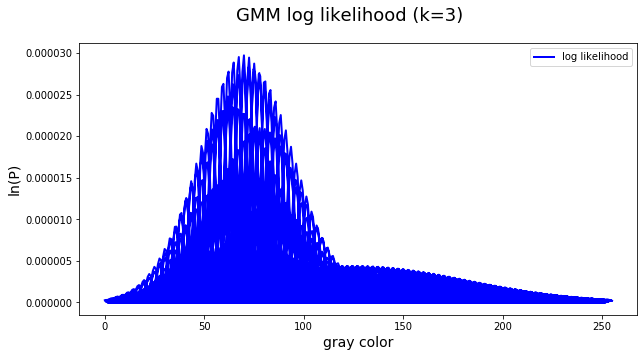

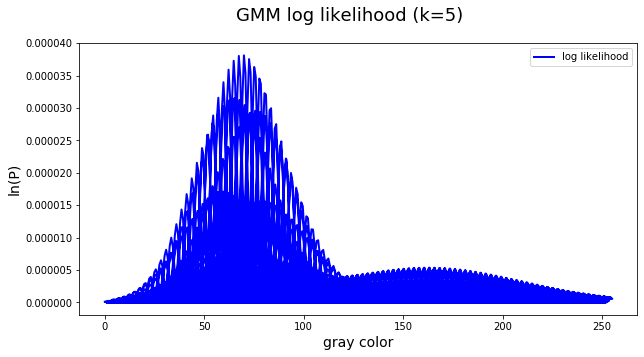

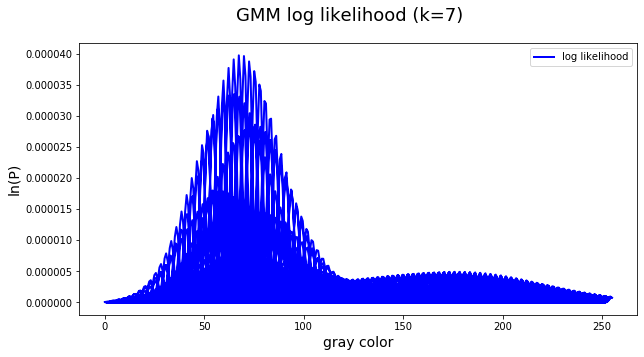

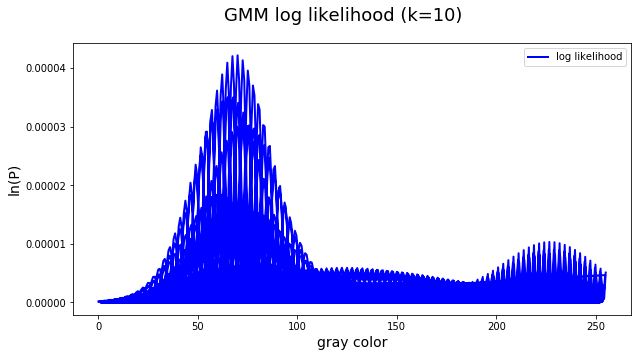

In [3]:
# Load Data 
print('*---------------------*')
print('*  loading image...  *')
print('*---------------------*')
img_path = ('/home/shaowen0213/ML/HW3/2020_ver/dataset/imghw3.jpg')
img = load_data(img_path)
# img = read_file()
train_data_size = len(img)
print(f'image size =:{train_data_size}')

k_mean_list = [3,5,7,10]
for k_mean_num in k_mean_list:
    kx = []     
    for i in range(k_mean_num):
        kx.append(img[ i * int(train_data_size/k_mean_num)])
    kmeans(img,kx,fig=0)
    print('\nFinal kmeans centers:')
    print('------------------------')
    for i in range(len(kmeans_center)):
        print('K={} cluster:{}'.format(k_mean_num,i))
        print('Center BGR {}'.format(kmeans_center[i]))
        print('{} datas in cluser {}'.format(len(kmeans_team[i]),i))
        print('------------------------')
    # save_img()
    GMM(img)